# Python playground

In [ ]:
a = [1, 'a']
[2, 4]  + a + ['df', 23]

[2, 4, 1, 'a', 'df', 23]

In [3]:
l1 = [1, 2, 3]
l2 = [4, 5, 6]
# l3 = [x * y for x, y in zip(l1, l2)]
l3 = l1 * l2
print(l3)

TypeError: can't multiply sequence by non-int of type 'list'

In [ ]:
cropSizes = {
'Vaihingen': 320,
'DFC2018': 320,
'Vaihingen_crp256': 256,
# 'Vaihingen_crp256_bin': 256,
'DFC2018_crp256': 256,
# 'DFC2018_crp256_bin': 256,
'DFC2019_crp256': 256,
# 'DFC2019_crp256_bin': 256,
'DFC2019_crp512': 512,
# 'DFC2019_crp512_bin': 512,
'DFC2023': 512,
}

dataset_name = 'Vaihingen_crp256_bin'  # Example dataset name

# # 2. Direct Dictionary Lookup
# cropSize = cropSizes.get(dataset_name, 256)  # Default to 256 if not found

# 3. Exact Match with Prefix Fallback (Recommended)
cropSize = cropSizes.get(dataset_name, next((size for dataset, size in sorted(cropSizes.items(), 
                                             key=lambda x: len(x[0]), reverse=True) 
                                      if dataset_name.startswith(dataset)), 256))

print(f"Crop size for {dataset_name}: {cropSize}")


Crop size for Vaihingen_crp256_bin: 500


In [15]:
# Define a combined dictionary with (cropSize, batchSize) tuples for each dataset
dataset_configs = {
    'Vaihingen': (320, 4),
    'DFC2018': (320, 4),
    'Vaihingen_crp256': (256, 10),
    'DFC2018_crp256': (256, 10),
    'DFC2019_crp256': (256, 10),
    'DFC2019_crp512': (512, 2),
    'DFC2023': (512, 2),
}

def get_crop_and_batch_size(dataset_name):
    # Get cropSize and batchSize based on dataset name, with fallback logic
    # First try exact match, then prefix match, then default to (256, 2)
    if dataset_name in dataset_configs:
        cropSize, batch_size = dataset_configs[dataset_name]
    else:
        # Find by prefix match if exact match not found
        matching_datasets = [d for d in dataset_configs.keys() if dataset_name.startswith(d)]
        if matching_datasets:
            # Sort by length descending to get the most specific match
            best_match = sorted(matching_datasets, key=len, reverse=True)[0]
            cropSize, batch_size = dataset_configs[best_match]
        else:
            # Default values if no match found
            cropSize, batch_size = 256, 2
    
    return cropSize, batch_size

# Example usage
dataset_name = 'Vaihingen_'  # Example dataset name
cropSize, batch_size = get_crop_and_batch_size(dataset_name)
print(f"Crop size for {dataset_name}: {cropSize}, Batch size: {batch_size}")

Crop size for Vaihingen_: 320, Batch size: 4


In [3]:
import numpy as np

# Example array
dsm_pred_ = np.array([
    [0, -1, 2],
    [3, 0, -4],
    [5, 6, 0]
])

# Single-line assignment
dsm_pred_[dsm_pred_ == 0], dsm_pred_[dsm_pred_ < 0] = 1e-5, 999

print(dsm_pred_)


[[  0 999   2]
 [  3   0 999]
 [  5   6   0]]


In [ ]:
import numpy as np

# Example output (grayscale image)
output = np.array([
    [0.1, 0.2, 0.0],
    [-0.5, 0.0, 0.3],
    [0.4, -0.2, 0.5]
])

# Example target
target = np.array([
    [0.5, 0.2, 0.0],
    [0.3, 0.0, 0.4],
    [0.0, 0.1, 0.6]
])

# Preprocessing
output[output == 0] = 0.00001
output[output < 0] = 999
target[target <= 0] = 0.00001

# Create valid mask
valid_mask = ((target > 0) + (output > 0)) > 0

# Apply mask
filtered_output = output[valid_mask]

print("Output array (before masking):")
print(output)

print("\nValid mask:")

print(valid_mask)

print("\nFiltered output (after masking):")
print(filtered_output)


Output array (before masking):
[[1.00e-01 2.00e-01 1.00e-05]
 [9.99e+02 1.00e-05 3.00e-01]
 [4.00e-01 9.99e+02 5.00e-01]]

Valid mask:
[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]

Filtered output (after masking):
[1.00e-01 2.00e-01 1.00e-05 9.99e+02 1.00e-05 3.00e-01 4.00e-01 9.99e+02
 5.00e-01]


In [ ]:
a.append(5466)
print(a)

[1, 'a', 123, 123, 123, 5466]


In [ ]:
cond = 12
if True:
    print("dd")
elif cond == 12:
    print("sds")
elif True:
    print("ghdfh")
else:
    print("sldfjsl")

dd


In [6]:
datasetName = 'DFC2024i'
datasets_with_sar = ['DFC2023', 'DFC2024']  # List of datasets that support SAR mode
sar_path_indicator = datasetName.startswith(tuple(datasets_with_sar))
sar_mode = False
sar_path_indicator,

(True,)

In [1]:
large_tile_data = ['Vaihingen', 'DFC2018']  

# Example 1: datasetName starts with 'Vaihingen'  
datasetName1 = 'Vaihingen_some_other_stuff'  
large_tile_mode1 = datasetName1.startswith(tuple(large_tile_data))  
print(f"datasetName: {datasetName1}, large_tile_mode: {large_tile_mode1}")  

# Example 2: datasetName starts with 'DFC2018'  
datasetName2 = 'DFC2018_another_thing'  
large_tile_mode2 = datasetName2.startswith(tuple(large_tile_data))  
print(f"datasetName: {datasetName2}, large_tile_mode: {large_tile_mode2}")  

# Example 3: datasetName does NOT start with either 'Vaihingen' or 'DFC2018'  
datasetName3 = 'OtherDataset_something'  
large_tile_mode3 = datasetName3.startswith(tuple(large_tile_data))  
print(f"datasetName: {datasetName3}, large_tile_mode: {large_tile_mode3}")  

# Example 4: datasetName is exactly 'Vaihingen'  
datasetName4 = 'Vaihingen'  
large_tile_mode4 = datasetName4.startswith(tuple(large_tile_data))  
print(f"datasetName: {datasetName4}, large_tile_mode: {large_tile_mode4}")  

# Example 5: datasetName is an empty string  
datasetName5 = ''  
large_tile_mode5 = datasetName5.startswith(tuple(large_tile_data))  
print(f"datasetName: {datasetName5}, large_tile_mode: {large_tile_mode5}")

datasetName: Vaihingen_some_other_stuff, large_tile_mode: True
datasetName: DFC2018_another_thing, large_tile_mode: True
datasetName: OtherDataset_something, large_tile_mode: False
datasetName: Vaihingen, large_tile_mode: True
datasetName: , large_tile_mode: False


In [5]:
datasetName = 'DFC2018m'
# Define cropSize based on dataset
cropSizes = {
    'Vaihingen': 320,
    'DFC2018': 320,
    'DFC2019': 256,
    'DFC2023': 512
}
# Get cropSize based on dataset name, defaulting to 256 if not found
cropSize = next((size for dataset, size in cropSizes.items() if datasetName.startswith(dataset)), 256)
cropSize

320

## download files from the remote Nova server using the terminal

In [3]:
username, server_address = "asfand", "nova"
# ! scp username@server_address:"checkpoints/DFC2023/{checkpoint,mtl.data-00000-of-00001,mtl.index,refinement.data-00000-of-00001,refinement.index}" "C:/Users/Ahmad/OneDrive - ozyegin.edu.tr/Desktop/Ozyegin University/research/DSMNet/checkpoints/DFC2023/-sar/"
# ! scp asfand@nova:"checkpoints/DFC2023/{checkpoint,mtl.data-00000-of-00001,mtl.index,refinement.data-00000-of-00001,refinement.index}" "C:/Users/Ahmad/OneDrive - ozyegin.edu.tr/Desktop/Ozyegin University/research/DSMNet/checkpoints/DFC2023/-sar/"
! scp nova:"checkpoints/DFC2023/{checkpoint,mtl.data-00000-of-00001,mtl.index,refinement.data-00000-of-00001,refinement.index}" "C:\Users\Ahmad\OneDrive - ozyegin.edu.tr\Desktop\Ozyegin University\research\DSMNet\checkpoints\DFC2023\-sar"


ssh: Could not resolve hostname c: Name or service not known
ssh: Could not resolve hostname nova: Name or service not known


/home/asfand/.conda/envs/bhe/lib/python3.7/site-packages/rioxarray/_io.py:841: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))


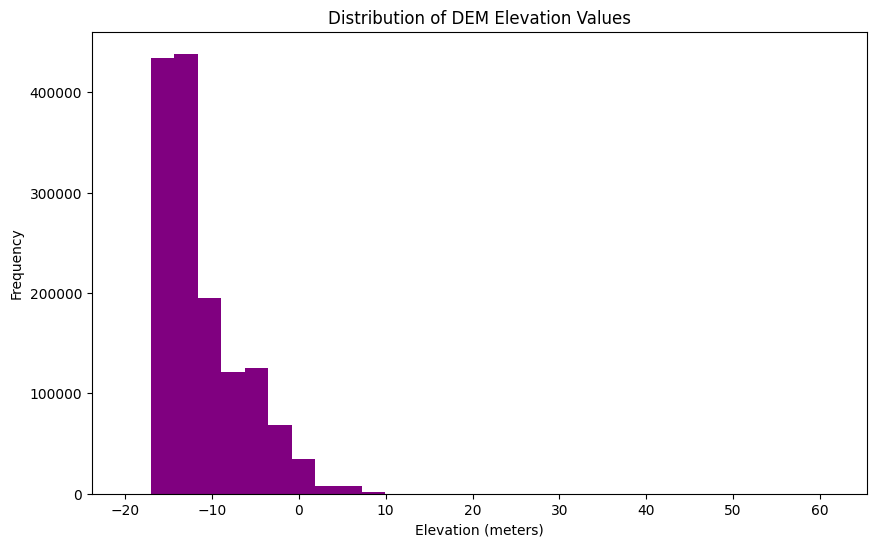

In [2]:
# !pip install rioxarray

import matplotlib.pyplot as plt
import rioxarray

# tif_path = 'H:/Ozyegin University/research/Building height estimation from satellite images/code/DSMNet/datasets/DFC2018/DSM/UH_NAD83_271460_3289689.tif'
tif_path = 'datasets/DFC2018/DSM/UH_NAD83_271460_3289689.tif'
tif_image = rioxarray.open_rasterio(tif_path, masked=True)

# Plot a histogram
fig, ax = plt.subplots(figsize=(10, 6))
tif_image.plot.hist(ax=ax, color="purple", bins=30)
ax.set(title="Distribution of DEM Elevation Values",
       xlabel='Elevation (meters)',
       ylabel='Frequency')
plt.show()


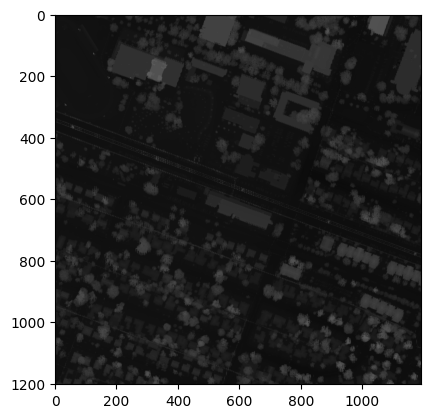

In [3]:

import matplotlib.pyplot as plt

plt.imshow(tif_image.squeeze(), cmap='gray')


In [3]:
# ((0.00459798620059338 - 0.004337424661245852) / 0.00459798620059338)* 100


a, b = 0.004847157038514, 0.004521829896508
((a - b) / a)* 100


6.711710378290844

In [4]:
self_mtl_unet_loss = {
    'Final_MSE_loss'  : 0.004300732907199894,
    'Final_MAE_loss'  : 0.03616120583776886,
    'Final_RMSE_loss' : 0.06284522301543065
}

self_mtl_unet_norm0_loss = {
    'Final_MSE_loss'  : 0.004193485327785344,
    'Final_MAE_loss'  : 0.03588460086816465,
    'Final_RMSE_loss' : 0.06224491875610796
}

for key,value in self_mtl_unet_loss.items():
    print((self_mtl_unet_loss[key] - self_mtl_unet_norm0_loss[key]) / self_mtl_unet_loss[key] * 100)

2.4937047179797114
0.7649218636268866
0.955210643735477


## plotting datasets images

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# File path
file_path = "GF2_Brasilia_-15.8680_-47.9352.tif"

# Open the .tif file
with rasterio.open(file_path) as src:
    # Read the image data
    image = src.read(1)  # Read the first band

# Check if the image is binary or grayscale
unique_values = np.unique(image)
if len(unique_values) == 2 and set(unique_values).issubset({0, 1}):
    print("The image is binary.")
elif unique_values.max() <= 255:
    print("The image is in 256 grayscale levels.")
else:
    print("The image is not binary or 256 gray levels.")

# Plot the image
plt.figure(figsize=(10, 10))
plt.imshow(image, cmap='gray')
plt.colorbar(label='Pixel Value')
plt.title("Image Plot")
plt.axis('off')
plt.show()


In [11]:
sar_mode = False
datasetName = 'DFC2023'

sar_indicator = ('+sar' if sar_mode else '-sar') if datasetName.startswith('DFC2023') else '.'
predCheckPointPath = f'./checkpoints/{datasetName}/{sar_indicator}/mtl'  # MTL checkpoints path
print(predCheckPointPath)


./checkpoints/DFC2023/-sar/mtl


In [24]:
if -0.1:
    print("sdf")

sdf


# Code debugging

## debug genNormals

In [2]:
import numpy as np
from PIL import Image
from utils import genNormals

# Load sample DSM
path_to_dsm = '../datasets/DFC2018/DSM/UH_NAD83_271460_3289689.tif'
dsm = np.array(Image.open(path_to_dsm))

# Generate normals
normals = genNormals(dsm)

# Check range and statistics
print(f"Normals min: {normals.min()}")
print(f"Normals max: {normals.max()}")
print(f"Normals mean: {normals.mean()}")
print(f"Normals dtype: {normals.dtype}")

# Save for visual inspection
normals_img = Image.fromarray((normals * 255).astype(np.uint8))
normals_img.save('normals_debug.png')

Normals min: 4.568922424841304e-07
Normals max: 1.0
Normals mean: 0.5404108199005488
Normals dtype: float64


In [1]:
import numpy as np
from utils import genNormals

# Generate sample DSM
dsm = np.random.rand(64, 64)
normals = genNormals(dsm)

print(f"Normals shape: {normals.shape}")  # Should be (64, 64, 3)
print(f"Value range: [{normals.min():.2f}, {normals.max():.2f}]")  # Should be [0, 1]
print(f"Channels: {normals.shape[-1]}")  # Should be 3

2025-02-01 01:15:25.936554: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


Normals shape: (64, 64, 3)
Value range: [0.00, 1.00]
Channels: 3


## check_gpu

In [3]:
import os
import sys
import tensorflow as tf
import subprocess

def check_cuda_environment():
    print("=== CUDA Environment Check ===")
    
    # Check CUDA paths
    cuda_path = os.getenv('CUDA_PATH')
    print(f"CUDA_PATH: {cuda_path}")
    
    # Check CUDA toolkit version
    try:
        nvcc_version = subprocess.check_output(['nvcc', '--version']).decode()
        print(f"NVCC Version:\n{nvcc_version}")
    except:
        print("NVCC not found in PATH")
    
    # Check TensorFlow GPU availability
    print("\n=== TensorFlow GPU Status ===")
    print(f"TensorFlow version: {tf.__version__}")
    print(f"GPU available: {tf.test.is_built_with_cuda()}")
    print(f"GPU devices: {tf.config.list_physical_devices('GPU')}")
    
    # Check CUDA libraries
    libs = ['libcudnn.so.7', 'libcuda.so', 'libnvinfer.so']
    print("\n=== CUDA Libraries ===")
    for lib in libs:
        result = subprocess.run(['ldconfig', '-p'], capture_output=True, text=True)
        if lib in result.stdout:
            print(f"{lib}: Found")
        else:
            print(f"{lib}: Not found")

if __name__ == "__main__":
    check_cuda_environment()

=== CUDA Environment Check ===
CUDA_PATH: None
NVCC Version:
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0


=== TensorFlow GPU Status ===
TensorFlow version: 2.4.1
GPU available: True
GPU devices: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

=== CUDA Libraries ===
libcudnn.so.7: Found
libcuda.so: Found
libnvinfer.so: Found


2025-01-27 22:20:07.308333: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2025-01-27 22:20:07.309987: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2025-01-27 22:20:07.421265: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:3b:00.0 name: NVIDIA GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.57GiB deviceMemoryBandwidth: 573.69GiB/s
2025-01-27 22:20:07.421350: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2025-01-27 22:20:07.423217: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2025-01-27 22:20:07.423327: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.

# Headless mode detection

In [ ]:
import os

# Check if DISPLAY is available
is_headless = os.environ.get('DISPLAY') is None

if is_headless:
    print("Headless mode detected!")
else:
    print("Display environment detected!")


Headless mode detected!


In [ ]:
import matplotlib

try:
    matplotlib.use('TkAgg')  # Try to use a GUI-based backend
    is_headless = False
except ImportError:
    is_headless = True

if is_headless:
    print("Headless mode detected!")
else:
    print("GUI environment detected!")


Headless mode detected!


In [ ]:
import os

# For Unix-like systems, check the DISPLAY environment variable
if os.name != 'nt':  # If not Windows
    is_headless = os.environ.get('DISPLAY') is None
else:
    # For Windows, there might be other heuristics like checking the remote session
    is_headless = os.environ.get('SESSIONNAME') == 'RDP-Tcp'

print(f"Headless mode: {is_headless}")


Headless mode: True


# Surface Normals and Edgemaps

In [87]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image


def genNormals(dsm_tile, mode='sobel'):
    """
    Generates normal vectors for a given DSM tile based on gradient calculations.

    Parameters:
    - dsm_tile (numpy.ndarray): The input DSM tile for which normals are to be generated.
    - mode (str): The mode of gradient calculation. Can be either 'gradient' or 'sobel'. Default is 'sobel'.

    Returns:
    - numpy.ndarray: The normalized tile with normal vectors.

    Raises:
    - ValueError: If the mode is neither 'gradient' nor 'sobel'.
    """
    # Validate the mode parameter
    if mode not in ['gradient', 'sobel']:
        raise ValueError("Mode must be either 'gradient' or 'sobel'.")

    # Calculate gradients based on the mode
    if mode == 'gradient':
        zy, zx = np.gradient(dsm_tile)
    elif mode == 'sobel':
        zx = cv2.Sobel(dsm_tile, cv2.CV_64F, 1, 0, ksize=5)
        zy = cv2.Sobel(dsm_tile, cv2.CV_64F, 0, 1, ksize=5)

    # Stack the gradients along the third dimension to form a 3D array
    norm_tile = np.dstack((-zx, -zy, np.ones_like(dsm_tile)))

    # Normalize the gradients
    n = np.linalg.norm(norm_tile, axis=2)
    norm_tile[:, :, 0] /= n
    norm_tile[:, :, 1] /= n
    norm_tile[:, :, 2] /= n

    # Adjust the normalization values
    norm_tile += 1
    norm_tile /= 2

    return norm_tile

# Edgemap configuration
# Threshold for potential rooftops out of nDSM (pixel values are supposed to be in [0, 255])
roof_height_threshold = 50
# Canny edge detection algorithm low and high thresholds for detecting potential edges for rooftops
canny_lt, canny_ht = 50, 150

def genEdgeMap(DSM, roof_height_threshold=roof_height_threshold, canny_lt=canny_lt, canny_ht=canny_ht):
    """
    Generates an edge map from a Digital Surface Model (DSM) image.
    
    Parameters:
    - DSM (numpy.ndarray): The input Digital Surface Model (DSM) image.
    - roof_height_threshold (float): Threshold value for identifying roof heights.
    - canny_lt (float): Lower threshold for Canny edge detection.
    - canny_ht (float): Higher threshold for Canny edge detection.
    
    Returns:
    - numpy.ndarray: An edge map generated from the input DSM image.
    """
    # Normalize DSM to range (0, 255) if not already and convert to uint8 for thresholding and edge detection
    if (DSM.min() >= 0 and DSM.max() <= 1) or DSM.min() < 0 or DSM.max() > 255:
        DSM = cv2.normalize(DSM, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    else:
        DSM = DSM.astype(np.uint8)

    # Find the roof height edges
    _, roof_height_edges = cv2.threshold(DSM, roof_height_threshold, 255, cv2.THRESH_BINARY)

    # Apply Gaussian smoothing to reduce noise
    edges_smoothed = cv2.GaussianBlur(roof_height_edges, (5, 5), 0)

    # Apply morphological operations to remove small contours
    # Adjust the kernel size and iterations as needed
    kernel = np.ones((3, 3), np.uint8)
    edges_cleaned = cv2.morphologyEx(edges_smoothed, cv2.MORPH_OPEN, kernel, iterations=2)

    # Apply Canny edge detection to enhance the edges
    edges = cv2.Canny(edges_cleaned, canny_lt, canny_ht)

    return edges


def normalize_array(arr, min, max):
    """
    Normalizes an array by scaling its values to the range [min, max].
    
    Parameters:
    - arr (numpy.ndarray): The input array to be normalized.
    
    Returns:
    - numpy.ndarray: The normalized array.
    """
    norm_arr = cv2.normalize(arr, None, min, max, cv2.NORM_MINMAX).astype(np.uint8)

    return norm_arr


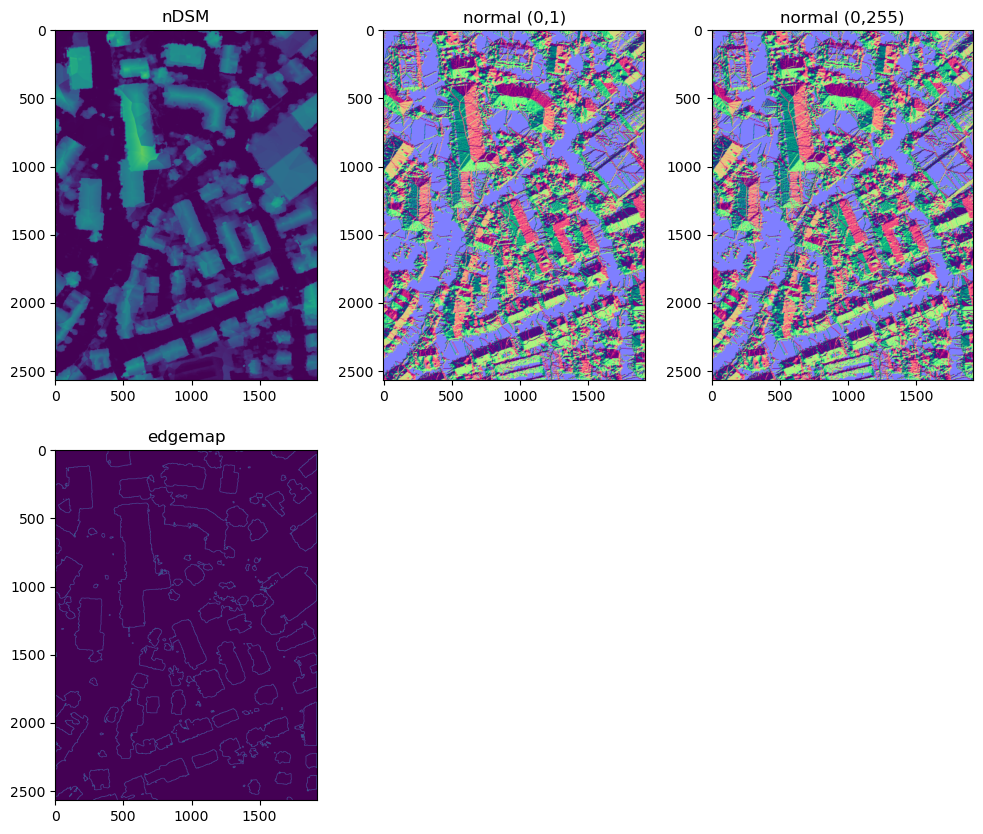

In [90]:

dsm_path = '../../datasets/Vaihingen/NDSM/dsm_09cm_matching_area1.jpg'
dsm = np.array(Image.open(dsm_path))

# Generate surface normals
norm = genNormals(dsm_tile=dsm)
norm_ = (norm * 255).astype(np.uint8)

# Generate edgemaps
edgemap = genEdgeMap(dsm)

# Display the original nDSM and the detected surface normals
plt.figure(figsize=(12,10))

plt.subplot(2, 3, 1); plt.imshow(dsm); plt.title('nDSM')
plt.subplot(2, 3, 2); plt.imshow(norm); plt.title('normal (0,1)')
plt.subplot(2, 3, 3); plt.imshow(norm_); plt.title('normal (0,255)')
plt.subplot(2, 3, 4); plt.imshow(edgemap); plt.title('edgemap')

plt.show()


In [91]:
import numpy as np

# Assuming dsm is a one-channel image stored as a NumPy array
array = edgemap
array_min = np.min(array)
array_max = np.max(array)

print(f"Range of array values: Min = {array_min}, Max = {array_max}")


Range of array values: Min = 0, Max = 255


In [16]:
import tensorflow as tf

# Assuming y_true and y_pred are your matrices
# For example:
y_true = np.array([[2.0, 2.5, 3.0, 5.0, 4.5], [2.0, 2.5, 3.0, 5.0, 4.5]], dtype=np.float32)
y_pred = np.array([[1.8, 2.7, 3.2, 4.8, 4.0], [1.8, 2.7, 3.2, 4.8, 4.0]], dtype=np.float32)

# Calculate Huber Loss
huber_loss_value = tf.keras.losses.Huber()(y_true, y_pred)

# Print the Huber Loss
print("Huber Loss:", huber_loss_value.numpy())


Huber Loss: 0.040999997


: 

# DSMNet prediction analysis

##### DFC2023

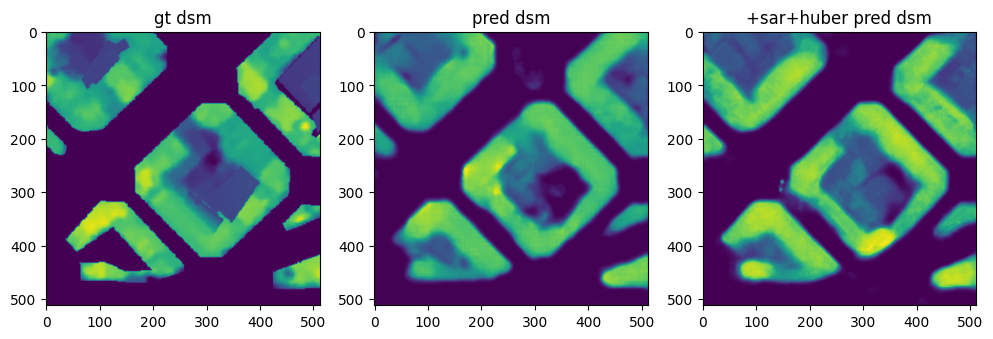

In [52]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

dsm_name = "SV_Barcelona_41.3774_2.1500.tif"
dsm_gt_path = f"./datasets/DFC2023/valid/dsm/{dsm_name}"
dsm_gt = np.array(Image.open(dsm_gt_path))
dsm_pred_path = f"./output/DFC2023/self_110*/{dsm_name}"
dsm_pred = np.array(Image.open(dsm_pred_path))
dsm_sar_pred_path = f"./output/DFC2023/self_sar-huber_110*/{dsm_name}"
dsm_sar_pred = np.array(Image.open(dsm_sar_pred_path))


# Display the original nDSM and the predicted DSMs
plt.figure(figsize=(12,8))
plt.subplot(1, 3, 1)
plt.imshow(dsm_gt)
plt.title('gt dsm')
plt.subplot(1, 3, 2)
plt.imshow(dsm_pred)
plt.title('pred dsm')
plt.subplot(1, 3, 3)
plt.imshow(dsm_sar_pred)
plt.title('+sar+huber pred dsm')
plt.show()


#### DFC2018

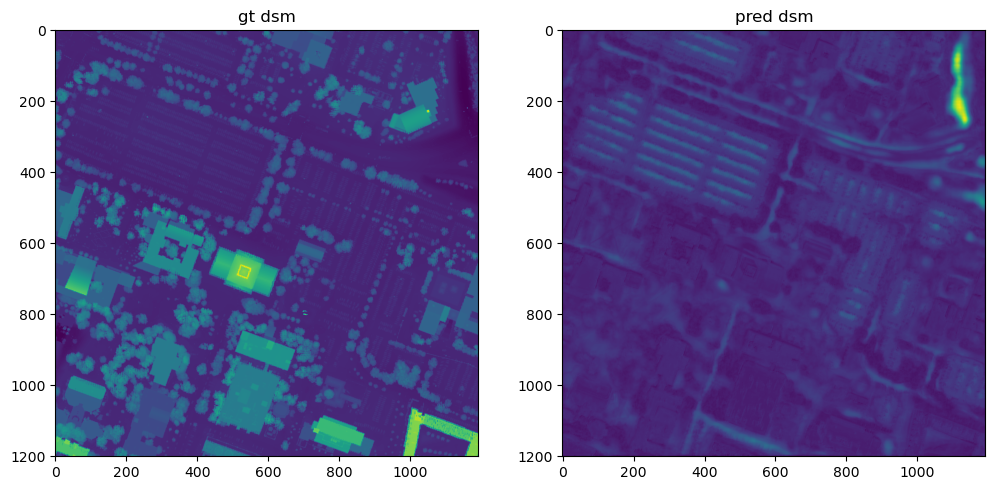

In [31]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

dsm_gt_path = "../../datasets/DFC2018/DSM/UH_NAD83_273248_3290290.tif"
dsm_gt = np.array(Image.open(dsm_gt_path))
dsm_pred_path = "../output/DFC2018/self_110*/UH_NAD83_273248_3290290.tif"
dsm_pred = np.array(Image.open(dsm_pred_path))


# Display the original nDSM and the predicted DSMs
plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
plt.imshow(dsm_gt)
plt.title('gt dsm')
plt.subplot(1, 2, 2)
plt.imshow(dsm_pred)
plt.title('pred dsm')
plt.show()


In [202]:
import numpy as np

# Assuming dsm is a one-channel image stored as a NumPy array
dsm_min = np.min(dsm_gt)
dsm_max = np.max(dsm_gt)

print(f"Range of DSM values: Min = {dsm_min}, Max = {dsm_max}")


Range of DSM values: Min = -20.72456169128418, Max = 23.391674041748047


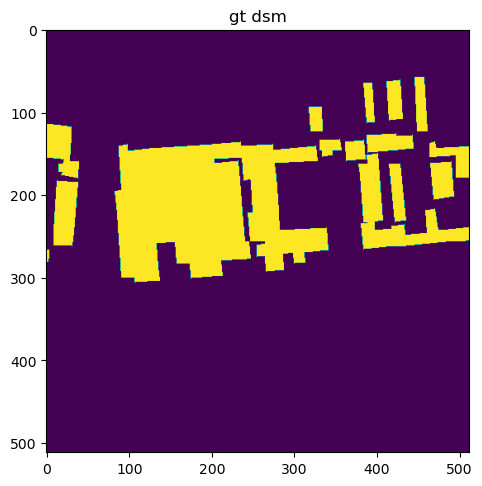

In [60]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# sem_gt_path = "../../datasets/Vaihingen/SEM/top_mosaic_09cm_area11.tif"
# sem_gt_path = "../../datasets/DFC2018/SEM/UH_NAD83_272056_3289689.tif"
sem_gt_path = "../../datasets/DFC2023/test/sem/GF2_Brasilia_-15.8706_-47.9338.tif"
sem_gt = np.array(Image.open(sem_gt_path))
# sem_pred_path = "../output/DFC2018/self_110*/UH_NAD83_273248_3290290.tif"
# sem_pred = np.array(Image.open(sem_pred_path))


# Display the original nDSM and the predicted DSMs
plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
plt.imshow(sem_gt)
plt.title('gt dsm')
# plt.subplot(1, 2, 2)
# plt.imshow(dsm_pred)
# plt.title('pred dsm')
plt.show()


In [61]:
sem_gt.shape

(512, 512)

# mIoU calculation


In [41]:
import numpy as np
import matplotlib.pyplot as plt

def convert_sem_output_to_annotation(sem_output, dataset, colormap):
    """
    Converts the softmax output (probability values) into the corresponding semantic annotation in the format of the ground truth.

    Parameters:
    - sem_output (numpy.ndarray): The softmax output of the semantic segmentation (probability values), shape (H, W, num_classes).
    - dataset (str): The name of the dataset to determine the mapping scheme ('Vaihingen', 'DFC2018', or 'DFC2023').
    - colormap (list): A list of color codes or class labels used for encoding the ground truth image.

    Returns:
    - numpy.ndarray: The semantic annotation in the format of the ground truth, either RGB image or single-channel class labels.
    """
    # Step 1: Convert the softmax probabilities into class predictions (one-hot encoded format)
    class_predictions = np.argmax(sem_output, axis=-1)  # Shape: (H, W), class with highest probability
    
    # Step 2: Map the one-hot predictions back to the original semantic annotation format (RGB or class labels)
    H, W = class_predictions.shape
    if dataset == 'Vaihingen':
        # Initialize the annotation tensor with the same shape as the input RGB (H, W, 3)
        sem_tensor = np.zeros((H, W, 3), dtype=np.uint8)
        for cls_idx, color in enumerate(colormap):
            mask = class_predictions == cls_idx
            sem_tensor[mask] = color  # Assign the RGB color to each class
    elif dataset == 'DFC2018':
        # Initialize the annotation tensor as a single-channel image with class IDs (H, W)
        sem_tensor = np.zeros((H, W), dtype=np.uint8)
        for cls_idx in range(len(colormap)):
            sem_tensor[class_predictions == cls_idx] = colormap[cls_idx]  # Assign class labels
    elif dataset in ('DFC2023', 'DFC2023small', 'DFC2023mini'):
        # For binary segmentation (buildings vs non-buildings), assign 0 or 1
        sem_tensor = np.zeros((H, W), dtype=np.uint8)
        sem_tensor[class_predictions == 1] = 1  # Assign buildings as class 1
        sem_tensor[class_predictions == 0] = 0  # Assign non-buildings as class 0

    return sem_tensor


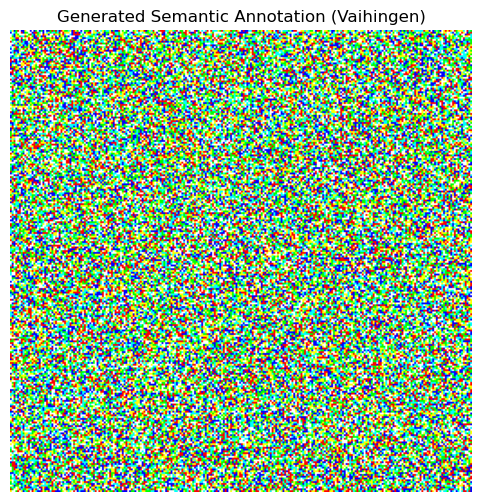

In [42]:
datasetName = 'Vaihingen'

if datasetName == 'Vaihingen':
    label_codes = [(255, 255, 255), (0, 0, 255), (0, 255, 255), (0, 255, 0), (255, 255, 0), (255, 0, 0)]
elif datasetName == 'DFC2018':
    label_codes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
elif datasetName in ('DFC2023', 'DFC2023small', 'DFC2023mini'):
    label_codes = [0, 1]

# Example softmax output from your model (e.g., shape H x W x num_classes)
sem_output = np.random.rand(256, 256, 6)  # Assuming Vaihingen with 6 classes

# Convert the softmax probabilities back to the format of the ground truth annotation
sem_tensor = convert_sem_output_to_annotation(sem_output, datasetName, label_codes)

# `sem_tensor` now contains the semantic annotation in RGB format (ground truth style)
# Plot the result
plt.figure(figsize=(6, 6))
plt.imshow(sem_tensor)
plt.title('Generated Semantic Annotation (Vaihingen)')
plt.axis('off')
plt.show()


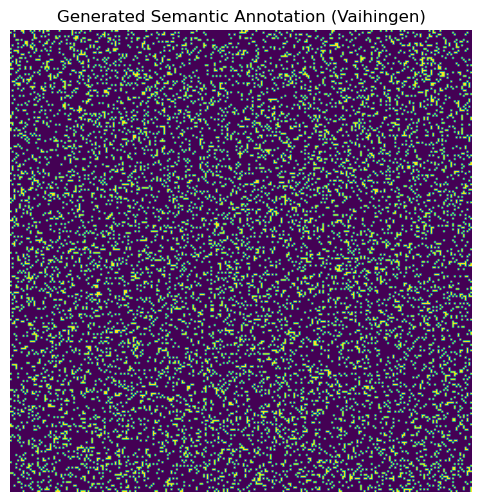

In [44]:
from PIL import Image
import numpy as np

datasetName= 'DFC2023'
# Load the image
sem_output_image = Image.open('sem_output_image.png')

# Convert it back to a NumPy array (if needed)
sem_output_array = np.array(sem_output_image)

# Convert the softmax probabilities back to the format of the ground truth annotation
sem_tensor = convert_sem_output_to_annotation(sem_output, datasetName, label_codes)

# `sem_tensor` now contains the semantic annotation in RGB format (ground truth style)
# Plot the result
plt.figure(figsize=(6, 6))
plt.imshow(sem_tensor)
plt.title('Generated Semantic Annotation (Vaihingen)')
plt.axis('off')
plt.show()

In [45]:
import numpy as np

def calculate_miou(sem_output, sem, num_classes):
    """
    Calculate the mean Intersection over Union (mIoU) between predicted and ground truth semantic segmentations.

    Parameters:
    - sem_output (numpy.ndarray): The predicted semantic output from the model in one-hot encoded format or class labels.
    - sem (numpy.ndarray): The ground truth segmentation in one-hot encoded format or class labels.
    - num_classes (int): Number of semantic classes.

    Returns:
    - mIoU (float): The mean IoU across all classes.
    - iou_per_class (list): IoU for each class.
    """
    # Convert one-hot encoded sem_output to class labels if necessary
    if len(sem_output.shape) == 4:  # If sem_output is one-hot encoded
        sem_output_categorical = np.argmax(sem_output, axis=-1)
    else:
        sem_output_categorical = sem_output
    
    # Convert one-hot encoded ground truth (sem) to class labels if necessary
    if len(sem.shape) == 4:  # If sem is one-hot encoded
        sem_categorical = np.argmax(sem, axis=-1)
    else:
        sem_categorical = sem

    # Initialize a list to store IoU values per class
    iou_per_class = []

    # Compute IoU for each class
    for i in range(num_classes):
        # Intersection: predicted == class i and ground truth == class i
        intersection = np.logical_and(sem_output_categorical == i, sem_categorical == i).sum()

        # Union: predicted == class i or ground truth == class i
        union = np.logical_or(sem_output_categorical == i, sem_categorical == i).sum()

        if union != 0:
            iou = intersection / union
            iou_per_class.append(iou)
        else:
            iou_per_class.append(np.nan)  # Avoid division by zero for missing classes

    # Calculate the mean IoU, ignoring classes not present (NaN)
    mIoU = np.nanmean(iou_per_class)

    return mIoU, iou_per_class


In [46]:
# Example: Assume we have predictions and ground truth for a segmentation task with 3 classes

# Simulated predicted semantic output (3 classes, [0, 1, 2])
sem_output_example = np.array([
    [0, 1, 2],
    [0, 1, 1],
    [2, 2, 0]
])

# Simulated ground truth for the same image
sem_example = np.array([
    [0, 1, 1],
    [0, 1, 2],
    [2, 2, 0]
])

# Number of classes
num_classes = 3

# Calculate mIoU
mIoU, iou_per_class = calculate_miou(sem_output_example, sem_example, num_classes)

print(f"Mean Intersection over Union (mIoU): {mIoU}")
print(f"IoU per class: {iou_per_class}")


Mean Intersection over Union (mIoU): 0.6666666666666666
IoU per class: [1.0, 0.5, 0.5]


# DFC2023 results

In [11]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


datasets_info = {
    'DFC2023': {
        'file_name': 'SV_Barcelona_41.3849_2.1481.tif', # 'SV_Barcelona_41.3787_2.1564.tif'
        'shortcut_path': '../../',
        'train_approach': '.' # '42epsMTL_56epsDAE_earlStop_lr=0.0002'  # '~100epsMTL_~8epsDAEearlStop_lr=0.0002'
    },
    'DFC2023small': {
        'file_name': 'SV_Sydney_-33.8677_151.1925.tif',
        'shortcut_path': '../../',
        'train_approach': '.'
    },
    'DFC2023mini': {
        'file_name': 'SV_Copenhagen_55.6800_12.5610.tif',
        'shortcut_path': '../../',
        'train_approach': '.'
    }
}

dataset_name = 'DFC2023'
file_name = datasets_info[dataset_name]['file_name']
shortcut_path = datasets_info[dataset_name]['shortcut_path']
train_approach = datasets_info[dataset_name]['train_approach']
sar_mode = '-sar'

rgb_path = f"{shortcut_path}/datasets/{dataset_name}/test/rgb/{file_name}"
rgb = np.array(Image.open(rgb_path))
sar_path = f"{shortcut_path}/datasets/{dataset_name}/test/sar/{file_name}"
sar = np.array(Image.open(sar_path))
sem_path = f"{shortcut_path}/datasets/{dataset_name}/test/sem/{file_name}"
sem = np.array(Image.open(sem_path))
dsm_gt_path = f"{shortcut_path}/datasets/{dataset_name}/test/dsm/{file_name}"
dsm_gt = np.array(Image.open(dsm_gt_path))

dsm_pred_mtl_path = f"../output/{dataset_name}/{sar_mode}/{train_approach}/dsm_110/{file_name}"
dsm_pred_mtl = np.array(Image.open(dsm_pred_mtl_path))
dsm_pred_dae_path = f"../output/{dataset_name}/{sar_mode}/{train_approach}/dsm_110+/{file_name}"
dsm_pred_dae = np.array(Image.open(dsm_pred_dae_path))
sem_pred_dae_path = f"../output/{dataset_name}/{sar_mode}/{train_approach}/sem/{file_name}"
sem_pred_dae = np.array(Image.open(sem_pred_dae_path))


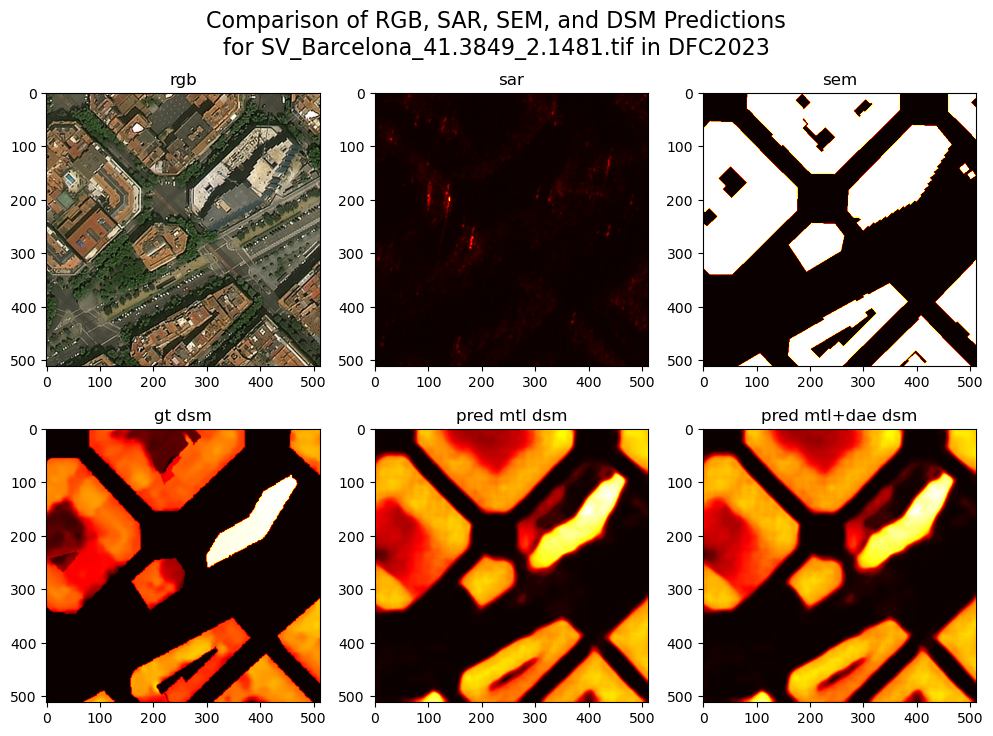

In [12]:
# Display the original nDSM and the predicted DSMs
plt.figure(figsize=(12,8))
plt.suptitle(f'Comparison of RGB, SAR, SEM, and DSM Predictions\nfor {file_name} in {dataset_name}', fontsize=16)

cmap = 'hot' #'viridis'
plt.subplot(2, 3, 1); plt.imshow(rgb, cmap=cmap); plt.title('rgb')
plt.subplot(2, 3, 2); plt.imshow(sar, cmap=cmap); plt.title('sar')
plt.subplot(2, 3, 3); plt.imshow(sem, cmap=cmap); plt.title('sem')
plt.subplot(2, 3, 4); plt.imshow(dsm_gt, cmap=cmap); plt.title('gt dsm')
plt.subplot(2, 3, 5); plt.imshow(dsm_pred_mtl, cmap=cmap); plt.title('pred mtl dsm')
plt.subplot(2, 3, 6); plt.imshow(dsm_pred_dae, cmap=cmap); plt.title('pred mtl+dae dsm')

plt.show()


### Generate uncertainty maps according to the following paper:



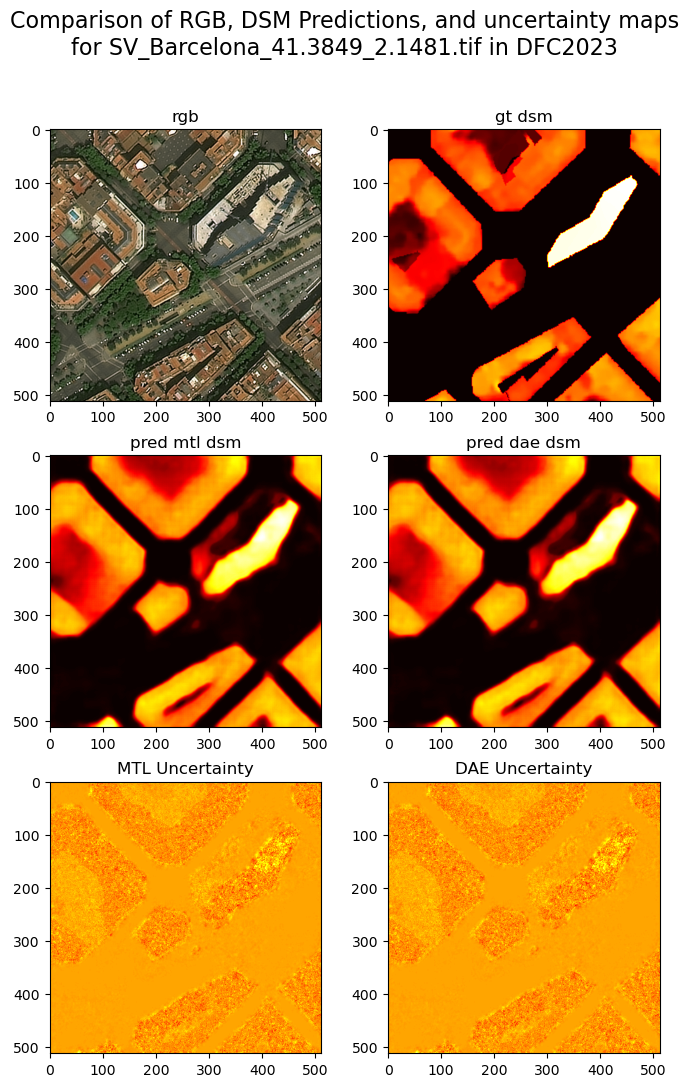

In [13]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


# 1. Calculate the aleatoric uncertainty (data noise) as the variance between the two predictions
aleatoric_uncertainty = np.abs(dsm_pred_mtl - dsm_pred_dae)

# 2. Perform Monte Carlo Dropout for epistemic uncertainty (multiple forward passes during test time)
# Here we assume you have the results of multiple predictions with dropout
# These are dummy predictions for illustration
mc_dropout_predictions_mtl = np.stack([dsm_pred_mtl for _ in range(10)])  # 10 stochastic passes
mc_dropout_predictions_dae = np.stack([dsm_pred_dae for _ in range(10)])  # 10 stochastic passes

# Calculate epistemic uncertainty as the variance across the predictions
epistemic_uncertainty_mtl = np.var(mc_dropout_predictions_mtl, axis=0)
epistemic_uncertainty_dae = np.var(mc_dropout_predictions_dae, axis=0)

# 3. Combine aleatoric and epistemic uncertainty to form the total uncertainty map
total_uncertainty_mtl = aleatoric_uncertainty + epistemic_uncertainty_mtl
total_uncertainty_dae = aleatoric_uncertainty + epistemic_uncertainty_dae

# 4. Plot the uncertainty maps
plt.figure(figsize=(8,12))
plt.suptitle(f'Comparison of RGB, DSM Predictions, and uncertainty maps\nfor {file_name} in {dataset_name}', fontsize=16)

plt.subplot(3, 2, 1); plt.imshow(rgb, cmap='hot'); plt.title('rgb')
plt.subplot(3, 2, 2); plt.imshow(dsm_gt, cmap='hot'); plt.title('gt dsm'); # plt.colorbar()
plt.subplot(3, 2, 3); plt.imshow(dsm_pred_mtl, cmap='hot'); plt.title('pred mtl dsm'); # plt.colorbar()
plt.subplot(3, 2, 4); plt.imshow(dsm_pred_dae, cmap='hot'); plt.title('pred dae dsm'); # plt.colorbar()
plt.subplot(3, 2, 5); plt.imshow(total_uncertainty_mtl, cmap='hot'); plt.title('MTL Uncertainty'); # plt.colorbar()
plt.subplot(3, 2, 6); plt.imshow(total_uncertainty_dae, cmap='hot'); plt.title('DAE Uncertainty'); # plt.colorbar()
plt.show()


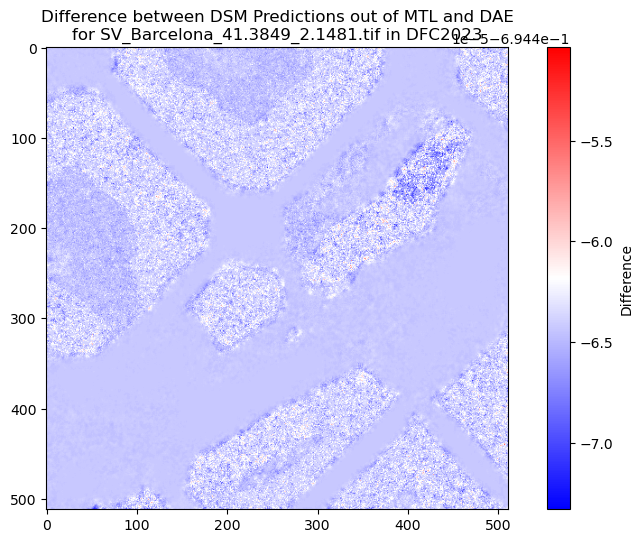

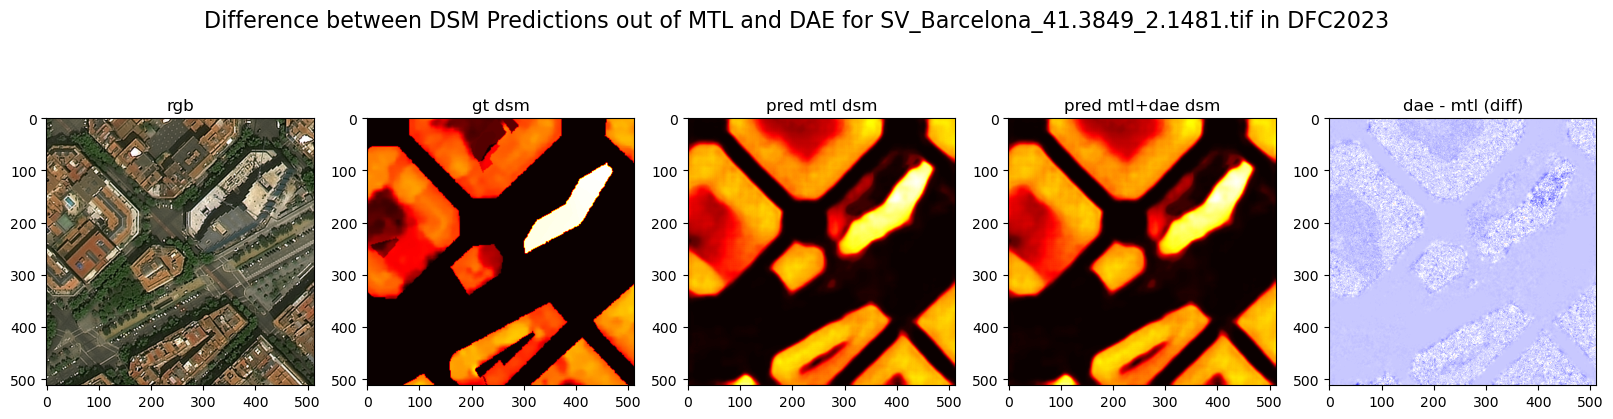

In [14]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


# 1. Calculate the difference between the two DSM predictions
# dsm_diff = dsm_pred_mtl - dsm_pred_dae
dsm_diff = dsm_pred_dae - dsm_pred_mtl 

# 2. Plot the difference
plt.figure(figsize=(10, 6))
plt.imshow(dsm_diff, cmap='bwr')  # 'bwr' colormap shows blue for negative, red for positive differences
plt.title(f'Difference between DSM Predictions out of MTL and DAE\nfor {file_name} in {dataset_name}')
plt.colorbar(label='Difference')  # Add a color bar to show the scale of the difference
plt.show()


# Plot with more details
plt.figure(figsize=(20,5))
plt.suptitle(f'Difference between DSM Predictions out of MTL and DAE for {file_name} in {dataset_name}', fontsize=16)

plt.subplot(1, 5, 1); plt.imshow(rgb, cmap='hot'); plt.title('rgb')
plt.subplot(1, 5, 2); plt.imshow(dsm_gt, cmap='hot'); plt.title('gt dsm'); # plt.colorbar()
plt.subplot(1, 5, 3); plt.imshow(dsm_pred_mtl, cmap='hot'); plt.title('pred mtl dsm'); # plt.colorbar()
plt.subplot(1, 5, 4); plt.imshow(dsm_pred_dae, cmap='hot'); plt.title('pred mtl+dae dsm'); # plt.colorbar()
plt.subplot(1, 5, 5); plt.imshow(dsm_diff, cmap='bwr'); plt.title('dae - mtl (diff)'); # plt.colorbar()  # 'bwr' colormap shows blue for negative, red for positive differences
plt.show()


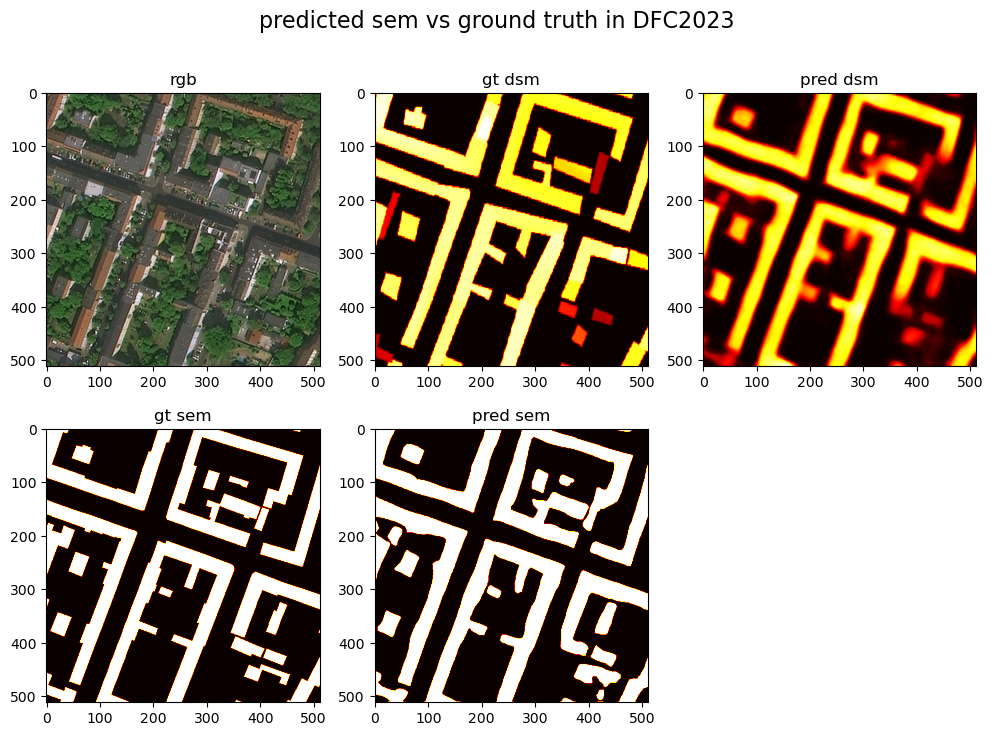

In [15]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

shortcut_path = '../../'
dataset_name = 'DFC2023'
file_name = 'SV_Berlin_52.5084_13.4973.tif' #'SV_NewDelhi_28.5836_77.0485.tif' # 'SV_Berlin_52.5043_13.4781.tif'

rgb_path = f"{shortcut_path}/datasets/{dataset_name}/test/rgb/{file_name}"
rgb = np.array(Image.open(rgb_path))
sem_path = f"{shortcut_path}/datasets/{dataset_name}/test/sem/{file_name}"
sem = np.array(Image.open(sem_path))
dsm_gt_path = f"{shortcut_path}/datasets/{dataset_name}/test/dsm/{file_name}"
dsm_gt = np.array(Image.open(dsm_gt_path))

# dsm_pred_path = f'../output/DFC2023/+sar/42epsMTL_56epsDAE_earlStop_lr=0.0002/dsm_110+/{file_name}'
# dsm_pred = np.array(Image.open(dsm_pred_path))
# sem_pred_path = f'../output/DFC2023/+sar/42epsMTL_56epsDAE_earlStop_lr=0.0002/sem/{file_name}'
# sem_pred = np.array(Image.open(sem_pred_path))

dsm_pred_path = f'../output/DFC2023/-sar/dsm_110+/{file_name}'
dsm_pred = np.array(Image.open(dsm_pred_path))
sem_pred_path = f'../output/DFC2023/-sar/sem/{file_name}'
sem_pred = np.array(Image.open(sem_pred_path))

# Plot with more details
plt.figure(figsize=(12,8))
plt.suptitle(f'predicted sem vs ground truth in {dataset_name}', fontsize=16)

plt.subplot(2, 3, 1); plt.imshow(rgb, cmap='hot'); plt.title('rgb')
plt.subplot(2, 3, 2); plt.imshow(dsm_gt, cmap='hot'); plt.title('gt dsm'); # plt.colorbar()
plt.subplot(2, 3, 3); plt.imshow(dsm_pred, cmap='hot'); plt.title('pred dsm'); # plt.colorbar()
plt.subplot(2, 3, 4); plt.imshow(sem, cmap='hot'); plt.title('gt sem'); # plt.colorbar()
plt.subplot(2, 3, 5); plt.imshow(sem_pred, cmap='hot'); plt.title('pred sem'); # plt.colorbar()
plt.show()



## Improvement calculation   

In [16]:
mtl_mse = 5.125941
dae_mse = 5.035536

improve_ratio = (mtl_mse - dae_mse) / mtl_mse * 100
print(f"dae improves over mtl by {improve_ratio:.4f}%")

dae improves over mtl by 1.7637%


# Perfect Footprints and Delta Metrics vs. Large RMSE: A Demonstrative Python Example

This script generates a ground truth DSM (Digital Surface Model) tile and a predicted DSM tile with specified building footprints and heights. It then computes various error metrics (mIoU, MSE, MAE, RMSE) and delta metrics to evaluate the prediction accuracy. Finally, it visualizes the ground truth and predicted DSM tiles side-by-side and prints out the computed metrics.

## overestimation scenario in prediction

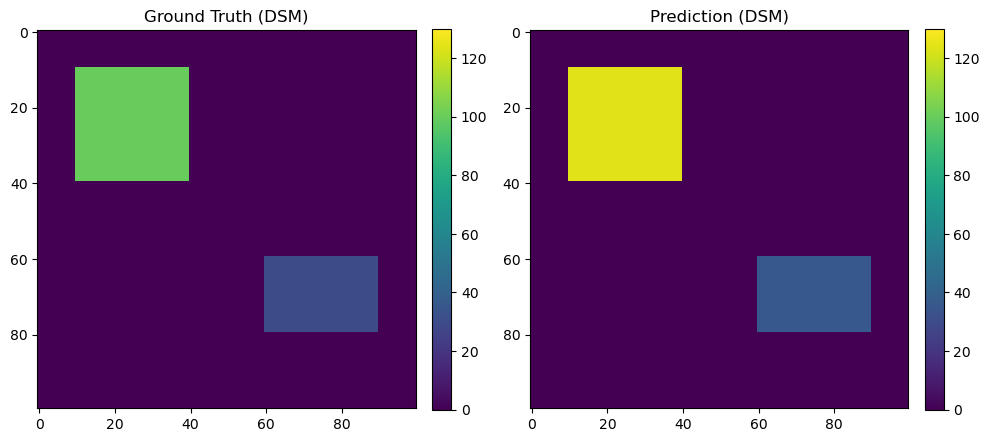

=== Metrics ===
mIoU:   1.00 (should be 1.00 for perfect footprint overlap)
MSE:    54.00
MAE:    2.52
RMSE:   7.35
delta1: 1.00  (ratio < 1.25)
delta2: 1.00  (ratio < 1.25^2)
delta3: 1.00  (ratio < 1.25^3)


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Create a "DSM tile" ground truth (GT) image.
#    We'll use a 100x100 array, with two building footprints:
#    - Building 1: 100 m tall, covering [10:40, 10:40]
#    - Building 2: 30  m tall, covering [60:80, 60:90]
dsm_tile = np.zeros((100, 100), dtype=float)
dsm_tile[10:40, 10:40] = 100  # Building 1
dsm_tile[60:80, 60:90] = 30   # Building 2

# 2. Create a predicted DSM with the *same* footprints (mIoU = 1),
#    but with systematically higher (yet within 25%) values:
#    - Building 1 predicted height = 124 (~24% higher than 100)
#    - Building 2 predicted height = 36  (~20% higher than 30)
dsm_pred = np.zeros((100, 100), dtype=float)
dsm_pred[10:40, 10:40] = 124  # Building 1
dsm_pred[60:80, 60:90] = 36   # Building 2

# 3. Compute mIoU (footprint overlap) as a sanity check
#    (All footprints overlap perfectly => IoU = 1.0)
gt_footprint_mask = dsm_tile > 0
pred_footprint_mask = dsm_pred > 0
intersection = np.logical_and(gt_footprint_mask, pred_footprint_mask).sum()
union = np.logical_or(gt_footprint_mask, pred_footprint_mask).sum()
mIoU = intersection / union

# 4. Compute error metrics: MSE, MAE, RMSE
abs_diff = np.abs(dsm_pred - dsm_tile)
tile_mse = np.mean(abs_diff ** 2)
tile_mae = np.mean(abs_diff)
tile_rmse = np.sqrt(tile_mse)

# 5. Compute delta metrics
#    We add a small epsilon to avoid division by zero when ground truth or pred = 0.
epsilon = 1e-9
max_ratio = np.maximum(dsm_pred / (dsm_tile + epsilon),
                       dsm_tile / (dsm_pred + epsilon))
tile_delta1 = np.mean(max_ratio < 1.25)
tile_delta2 = np.mean(max_ratio < 1.25 ** 2)
tile_delta3 = np.mean(max_ratio < 1.25 ** 3)

# 6. Plot the ground truth and prediction side-by-side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
im1 = axs[0].imshow(dsm_tile, cmap='viridis', vmin=0, vmax=130)
axs[0].set_title("Ground Truth (DSM)")
fig.colorbar(im1, ax=axs[0], fraction=0.046, pad=0.04)

im2 = axs[1].imshow(dsm_pred, cmap='viridis', vmin=0, vmax=130)
axs[1].set_title("Prediction (DSM)")
fig.colorbar(im2, ax=axs[1], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

# 7. Print out the metrics
print("=== Metrics ===")
print(f"mIoU:   {mIoU:.2f} (should be 1.00 for perfect footprint overlap)")
print(f"MSE:    {tile_mse:.2f}")
print(f"MAE:    {tile_mae:.2f}")
print(f"RMSE:   {tile_rmse:.2f}")
print(f"delta1: {tile_delta1:.2f}  (ratio < 1.25)")
print(f"delta2: {tile_delta2:.2f}  (ratio < 1.25^2)")
print(f"delta3: {tile_delta3:.2f}  (ratio < 1.25^3)")


## underestimation scenario in prediction

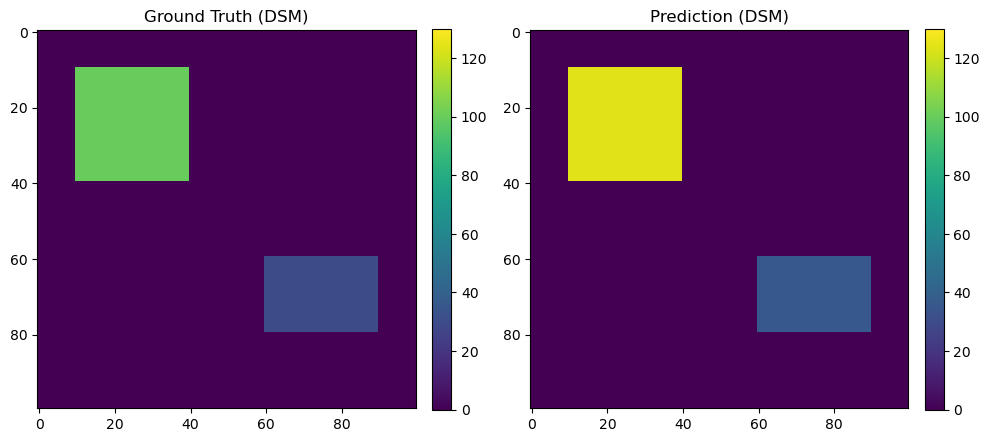

=== Metrics ===
mIoU:   1.00 (should be 1.00 for perfect footprint overlap)
MSE:    54.00
MAE:    2.52
RMSE:   7.35
delta1: 1.00  (ratio < 1.25)
delta2: 1.00  (ratio < 1.25^2)
delta3: 1.00  (ratio < 1.25^3)


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Create a "DSM tile" ground truth (GT) image.
#    We'll use a 100x100 array, with two building footprints:
#    - Building 1: 100 m tall, covering [10:40, 10:40]
#    - Building 2: 30  m tall, covering [60:80, 60:90]
dsm_tile = np.zeros((100, 100), dtype=float)
dsm_tile[10:40, 10:40] = 100  # Building 1
dsm_tile[60:80, 60:90] = 30   # Building 2

# 2. Create a predicted DSM with the *same* footprints (mIoU = 1),
#    but with systematically higher (yet within 25%) values:
#    - Building 1 predicted height = 124 (~24% higher than 100)
#    - Building 2 predicted height = 36  (~20% higher than 30)
dsm_pred = np.zeros((100, 100), dtype=float)
dsm_pred[10:40, 10:40] = 124  # Building 1
dsm_pred[60:80, 60:90] = 36   # Building 2

# 3. Compute mIoU (footprint overlap) as a sanity check
#    (All footprints overlap perfectly => IoU = 1.0)
gt_footprint_mask = dsm_tile > 0
pred_footprint_mask = dsm_pred > 0
intersection = np.logical_and(gt_footprint_mask, pred_footprint_mask).sum()
union = np.logical_or(gt_footprint_mask, pred_footprint_mask).sum()
mIoU = intersection / union

# 4. Compute error metrics: MSE, MAE, RMSE
abs_diff = np.abs(dsm_pred - dsm_tile)
tile_mse = np.mean(abs_diff ** 2)
tile_mae = np.mean(abs_diff)
tile_rmse = np.sqrt(tile_mse)

# 5. Compute delta metrics
#    We add a small epsilon to avoid division by zero when ground truth or pred = 0.
epsilon = 1e-9
max_ratio = np.maximum(dsm_pred / (dsm_tile + epsilon),
                       dsm_tile / (dsm_pred + epsilon))
tile_delta1 = np.mean(max_ratio < 1.25)
tile_delta2 = np.mean(max_ratio < 1.25 ** 2)
tile_delta3 = np.mean(max_ratio < 1.25 ** 3)

# 6. Plot the ground truth and prediction side-by-side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
im1 = axs[0].imshow(dsm_tile, cmap='viridis', vmin=0, vmax=130)
axs[0].set_title("Ground Truth (DSM)")
fig.colorbar(im1, ax=axs[0], fraction=0.046, pad=0.04)

im2 = axs[1].imshow(dsm_pred, cmap='viridis', vmin=0, vmax=130)
axs[1].set_title("Prediction (DSM)")
fig.colorbar(im2, ax=axs[1], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

# 7. Print out the metrics
print("=== Metrics ===")
print(f"mIoU:   {mIoU:.2f} (should be 1.00 for perfect footprint overlap)")
print(f"MSE:    {tile_mse:.2f}")
print(f"MAE:    {tile_mae:.2f}")
print(f"RMSE:   {tile_rmse:.2f}")
print(f"delta1: {tile_delta1:.2f}  (ratio < 1.25)")
print(f"delta2: {tile_delta2:.2f}  (ratio < 1.25^2)")
print(f"delta3: {tile_delta3:.2f}  (ratio < 1.25^3)")


## one footprint overestimated, the other underestimated

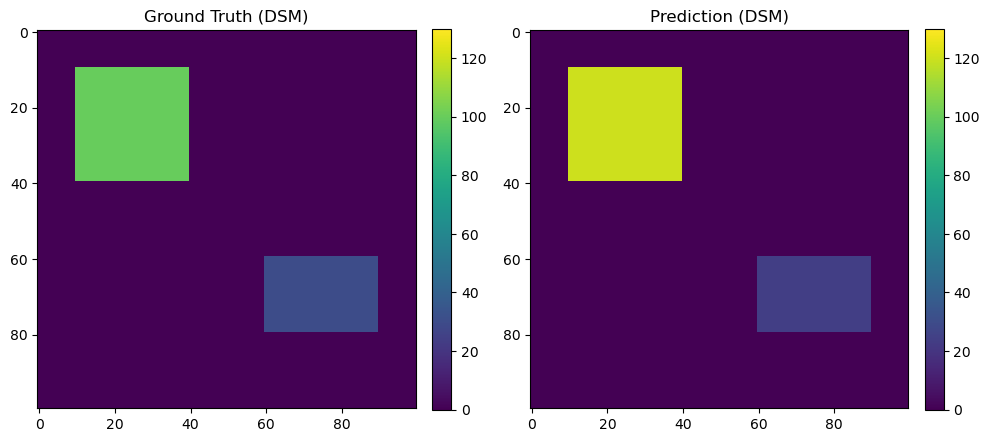

=== Metrics ===
mIoU:   1.00 (should be 1.00 for perfect footprint overlap)
MSE:    38.16
MAE:    2.16
RMSE:   6.18
delta1: 1.00  (ratio < 1.25)
delta2: 1.00  (ratio < 1.25^2)
delta3: 1.00  (ratio < 1.25^3)


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Create a "DSM tile" ground truth (GT) image.
#    We'll use a 100x100 array, with two building footprints:
#    - Building 1: 100 m tall, covering [10:40, 10:40]
#    - Building 2: 30  m tall, covering [60:80, 60:90]
dsm_tile = np.zeros((100, 100), dtype=float)
dsm_tile[10:40, 10:40] = 100  # Building 1
dsm_tile[60:80, 60:90] = 30   # Building 2

# 2. Create a predicted DSM with the *same* footprints (mIoU = 1),
#    but with values within the range [0.8 * GT, 1.25 * GT]:
#    - Building 1 predicted height = 120 (within 20% higher than 100)
#    - Building 2 predicted height = 24  (within 20% lower than 30)
dsm_pred = np.zeros((100, 100), dtype=float)
dsm_pred[10:40, 10:40] = 120  # Building 1
dsm_pred[60:80, 60:90] = 24   # Building 2

# 3. Compute mIoU (footprint overlap) as a sanity check
#    (All footprints overlap perfectly => IoU = 1.0)
gt_footprint_mask = dsm_tile > 0
pred_footprint_mask = dsm_pred > 0
intersection = np.logical_and(gt_footprint_mask, pred_footprint_mask).sum()
union = np.logical_or(gt_footprint_mask, pred_footprint_mask).sum()
mIoU = intersection / union

# 4. Compute error metrics: MSE, MAE, RMSE
abs_diff = np.abs(dsm_pred - dsm_tile)
tile_mse = np.mean(abs_diff ** 2)
tile_mae = np.mean(abs_diff)
tile_rmse = np.sqrt(tile_mse)

# 5. Compute delta metrics
#    We add a small epsilon to avoid division by zero when ground truth or pred = 0.
epsilon = 1e-9
max_ratio = np.maximum(dsm_pred / (dsm_tile + epsilon),
                       dsm_tile / (dsm_pred + epsilon))
tile_delta1 = np.mean(max_ratio < 1.25)
tile_delta2 = np.mean(max_ratio < 1.25 ** 2)
tile_delta3 = np.mean(max_ratio < 1.25 ** 3)

# 6. Plot the ground truth and prediction side-by-side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
im1 = axs[0].imshow(dsm_tile, cmap='viridis', vmin=0, vmax=130)
axs[0].set_title("Ground Truth (DSM)")
fig.colorbar(im1, ax=axs[0], fraction=0.046, pad=0.04)

im2 = axs[1].imshow(dsm_pred, cmap='viridis', vmin=0, vmax=130)
axs[1].set_title("Prediction (DSM)")
fig.colorbar(im2, ax=axs[1], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

# 7. Print out the metrics
print("=== Metrics ===")
print(f"mIoU:   {mIoU:.2f} (should be 1.00 for perfect footprint overlap)")
print(f"MSE:    {tile_mse:.2f}")
print(f"MAE:    {tile_mae:.2f}")
print(f"RMSE:   {tile_rmse:.2f}")
print(f"delta1: {tile_delta1:.2f}  (ratio < 1.25)")
print(f"delta2: {tile_delta2:.2f}  (ratio < 1.25^2)")
print(f"delta3: {tile_delta3:.2f}  (ratio < 1.25^3)")

## over-under estimation distributed 

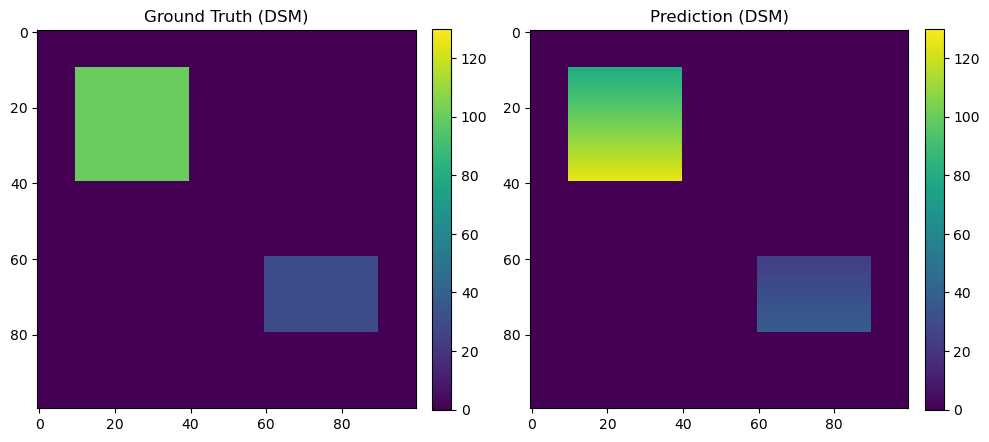

=== Metrics ===
mIoU:   1.00 (should be 1.00 for perfect footprint overlap)
MSE:    17.84
MAE:    1.27
RMSE:   4.22
delta1: 1.00  (ratio < 1.25)
delta2: 1.00  (ratio < 1.25^2)
delta3: 1.00  (ratio < 1.25^3)


In [11]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Create a "DSM tile" ground truth (GT) image.
#    We'll use a 100x100 array, with two building footprints:
#    - Building 1: 100 m tall, covering [10:40, 10:40]
#    - Building 2: 30  m tall, covering [60:80, 60:90]
dsm_tile = np.zeros((100, 100), dtype=float)
dsm_tile[10:40, 10:40] = 100  # Building 1
dsm_tile[60:80, 60:90] = 30   # Building 2

# 2. Create a predicted DSM with the *same* footprints (mIoU = 1),
#    but with values within the range [0.8 * GT, 1.25 * GT]:
#    - Building 1 predicted height varies between 80 and 125
#    - Building 2 predicted height varies between 24 and 37.5
dsm_pred = np.zeros((100, 100), dtype=float)
dsm_pred[10:40, 10:40] = np.linspace(80, 125, 30).reshape(30, 1)  # Building 1 gradient
dsm_pred[60:80, 60:90] = np.linspace(24, 37.5, 20).reshape(20, 1)  # Building 2 gradient

# 3. Compute mIoU (footprint overlap) as a sanity check
#    (All footprints overlap perfectly => IoU = 1.0)
gt_footprint_mask = dsm_tile > 0
pred_footprint_mask = dsm_pred > 0
intersection = np.logical_and(gt_footprint_mask, pred_footprint_mask).sum()
union = np.logical_or(gt_footprint_mask, pred_footprint_mask).sum()
mIoU = intersection / union

# 4. Compute error metrics: MSE, MAE, RMSE
abs_diff = np.abs(dsm_pred - dsm_tile)
tile_mse = np.mean(abs_diff ** 2)
tile_mae = np.mean(abs_diff)
tile_rmse = np.sqrt(tile_mse)

# 5. Compute delta metrics
#    We add a small epsilon to avoid division by zero when ground truth or pred = 0.
epsilon = 1e-9
max_ratio = np.maximum(dsm_pred / (dsm_tile + epsilon),
                       dsm_tile / (dsm_pred + epsilon))
tile_delta1 = np.mean(max_ratio < 1.25)
tile_delta2 = np.mean(max_ratio < 1.25 ** 2)
tile_delta3 = np.mean(max_ratio < 1.25 ** 3)

# 6. Plot the ground truth and prediction side-by-side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
im1 = axs[0].imshow(dsm_tile, cmap='viridis', vmin=0, vmax=130)
axs[0].set_title("Ground Truth (DSM)")
fig.colorbar(im1, ax=axs[0], fraction=0.046, pad=0.04)

im2 = axs[1].imshow(dsm_pred, cmap='viridis', vmin=0, vmax=130)
axs[1].set_title("Prediction (DSM)")
fig.colorbar(im2, ax=axs[1], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

# 7. Print out the metrics
print("=== Metrics ===")
print(f"mIoU:   {mIoU:.2f} (should be 1.00 for perfect footprint overlap)")
print(f"MSE:    {tile_mse:.2f}")
print(f"MAE:    {tile_mae:.2f}")
print(f"RMSE:   {tile_rmse:.2f}")
print(f"delta1: {tile_delta1:.2f}  (ratio < 1.25)")
print(f"delta2: {tile_delta2:.2f}  (ratio < 1.25^2)")
print(f"delta3: {tile_delta3:.2f}  (ratio < 1.25^3)")

## lots of short buildings with overestimation

### version 1

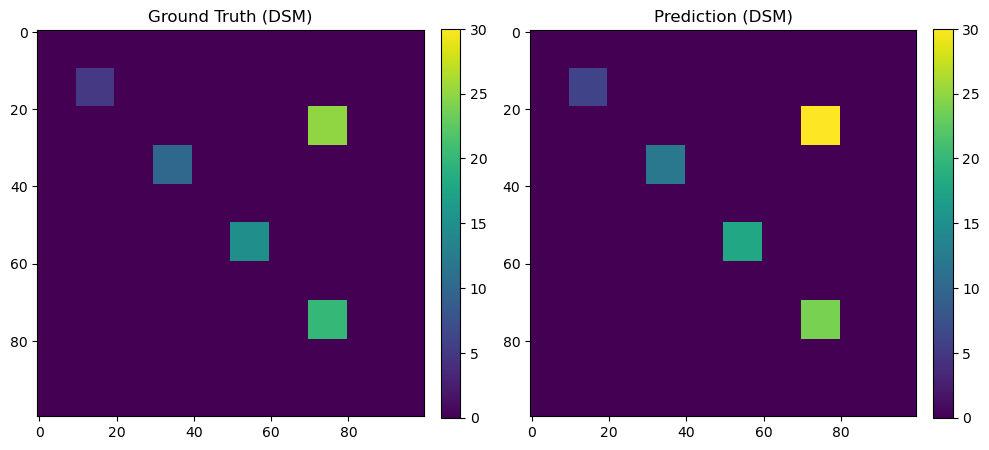

=== Metrics ===
mIoU:   1.00 (should be 1.00 for perfect footprint overlap)
MSE:    0.55
MAE:    0.15
RMSE:   0.74
delta1: 1.00  (ratio < 1.25)
delta2: 1.00  (ratio < 1.25^2)
delta3: 1.00  (ratio < 1.25^3)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Create a "DSM tile" ground truth (GT) image with multiple short buildings.
dsm_tile = np.zeros((100, 100), dtype=float)
# Define multiple short buildings
buildings = [
    (10, 10, 20, 20, 5),  # (x_start, y_start, x_end, y_end, height)
    (30, 30, 40, 40, 10),
    (50, 50, 60, 60, 15),
    (70, 70, 80, 80, 20),
    (20, 70, 30, 80, 25) 
]
for x_start, y_start, x_end, y_end, height in buildings:
    dsm_tile[x_start:x_end, y_start:y_end] = height

# 2. Create a predicted DSM with the same footprints but with systematically higher values.
dsm_pred = np.zeros((100, 100), dtype=float)
# Increase the height of each building by a certain percentage
for x_start, y_start, x_end, y_end, height in buildings:
    dsm_pred[x_start:x_end, y_start:y_end] = height * 1.2  # 20% higher

# 3. Compute mIoU (footprint overlap) as a sanity check
gt_footprint_mask = dsm_tile > 0
pred_footprint_mask = dsm_pred > 0
intersection = np.logical_and(gt_footprint_mask, pred_footprint_mask).sum()
union = np.logical_or(gt_footprint_mask, pred_footprint_mask).sum()
mIoU = intersection / union

# 4. Compute error metrics: MSE, MAE, RMSE
abs_diff = np.abs(dsm_pred - dsm_tile)
tile_mse = np.mean(abs_diff ** 2)
tile_mae = np.mean(abs_diff)
tile_rmse = np.sqrt(tile_mse)

# 5. Compute delta metrics
epsilon = 1e-9
max_ratio = np.maximum(dsm_pred / (dsm_tile + epsilon),
                       dsm_tile / (dsm_pred + epsilon))
tile_delta1 = np.mean(max_ratio < 1.25)
tile_delta2 = np.mean(max_ratio < 1.25 ** 2)
tile_delta3 = np.mean(max_ratio < 1.25 ** 3)

# 6. Plot the ground truth and prediction side-by-side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
im1 = axs[0].imshow(dsm_tile, cmap='viridis', vmin=0, vmax=30)
axs[0].set_title("Ground Truth (DSM)")
fig.colorbar(im1, ax=axs[0], fraction=0.046, pad=0.04)

im2 = axs[1].imshow(dsm_pred, cmap='viridis', vmin=0, vmax=30)
axs[1].set_title("Prediction (DSM)")
fig.colorbar(im2, ax=axs[1], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

# 7. Print out the metrics
print("=== Metrics ===")
print(f"mIoU:   {mIoU:.2f} (should be 1.00 for perfect footprint overlap)")
print(f"MSE:    {tile_mse:.2f}")
print(f"MAE:    {tile_mae:.2f}")
print(f"RMSE:   {tile_rmse:.2f}")
print(f"delta1: {tile_delta1:.2f}  (ratio < 1.25)")
print(f"delta2: {tile_delta2:.2f}  (ratio < 1.25^2)")
print(f"delta3: {tile_delta3:.2f}  (ratio < 1.25^3)")

### version 2

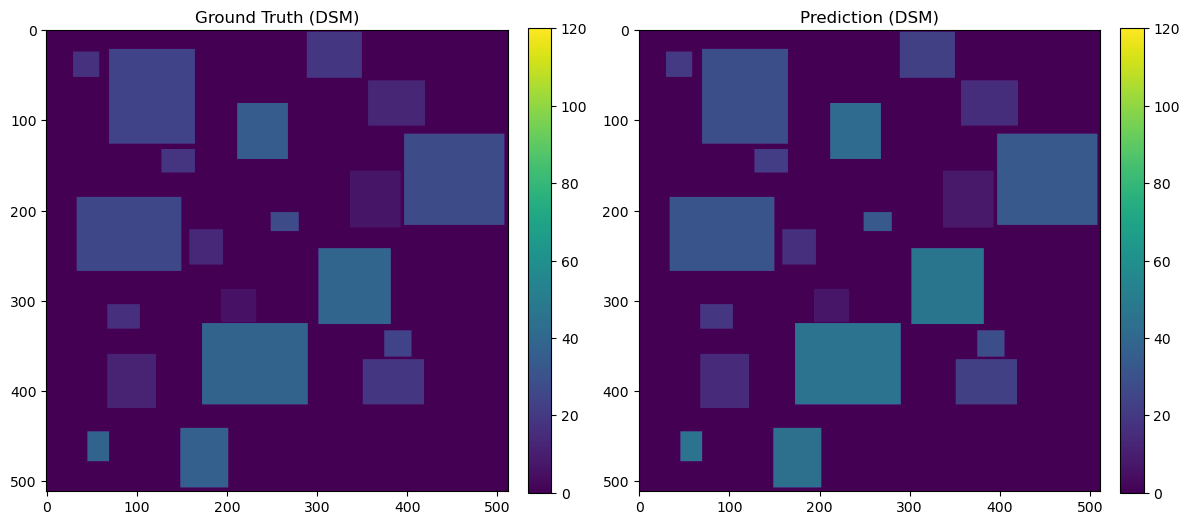

=== Metrics ===
mIoU:   1.00
MSE:    9.50
MAE:    1.59
RMSE:   3.08
delta1: 1.00
delta2: 1.00
delta3: 1.00


In [40]:
import numpy as np
import matplotlib.pyplot as plt

def check_overlap(rect1, rect2):
    """Check if two rectangles overlap"""
    x1, y1, w1, h1 = rect1
    x2, y2, w2, h2 = rect2
    return not (x1 + w1 <= x2 or x2 + w2 <= x1 or
               y1 + h1 <= y2 or y2 + h2 <= y1)

def generate_building(size_range):
    """Generate random building dimensions within given range"""
    min_size, max_size = size_range
    width = np.random.randint(min_size, max_size)
    height = np.random.randint(min_size, max_size)
    return width, height

def try_place_buildings(tile_size=512, n_buildings=20):
    buildings = []  # (x_start, y_start, width, height, building_height)
    size_ranges = [(20,40)]*8 + [(50,70)]*7 + [(80,120)]*5  # Mix of sizes
    max_attempts = 1000
    
    for size_range in size_ranges:
        attempts = 0
        while attempts < max_attempts:
            width, height = generate_building(size_range)
            x = np.random.randint(0, tile_size - width)
            y = np.random.randint(0, tile_size - height)
            building_height = np.random.randint(5, 40)
            
            # Check overlap with existing buildings
            new_rect = (x, y, width, height)
            overlap = False
            for b in buildings:
                if check_overlap(new_rect, (b[0], b[1], b[2], b[3])):
                    overlap = True
                    break
            
            if not overlap:
                buildings.append((x, y, width, height, building_height))
                break
            attempts += 1
    
    return buildings

# Create DSM tile with non-overlapping buildings
dsm_tile = np.zeros((512, 512), dtype=float)
dsm_pred = np.zeros((512, 512), dtype=float)

# Generate and place buildings
buildings = try_place_buildings()
for x, y, w, h, height in buildings:
    dsm_tile[x:x+w, y:y+h] = height
    dsm_pred[x:x+w, y:y+h] = height * 1.2  # 20% higher

# Rest of the metrics computation and visualization code
gt_footprint_mask = dsm_tile > 0
pred_footprint_mask = dsm_pred > 0
intersection = np.logical_and(gt_footprint_mask, pred_footprint_mask).sum()
union = np.logical_or(gt_footprint_mask, pred_footprint_mask).sum()
mIoU = intersection / union

abs_diff = np.abs(dsm_pred - dsm_tile)
tile_mse = np.mean(abs_diff ** 2)
tile_mae = np.mean(abs_diff)
tile_rmse = np.sqrt(tile_mse)

epsilon = 1e-9
max_ratio = np.maximum(dsm_pred / (dsm_tile + epsilon),
                       dsm_tile / (dsm_pred + epsilon))
tile_delta1 = np.mean(max_ratio < 1.25)
tile_delta2 = np.mean(max_ratio < 1.25 ** 2)
tile_delta3 = np.mean(max_ratio < 1.25 ** 3)

# Visualization
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
im1 = axs[0].imshow(dsm_tile, cmap='viridis', vmin=0, vmax=120)
axs[0].set_title("Ground Truth (DSM)")
fig.colorbar(im1, ax=axs[0], fraction=0.046, pad=0.04)

im2 = axs[1].imshow(dsm_pred, cmap='viridis', vmin=0, vmax=120)
axs[1].set_title("Prediction (DSM)")
fig.colorbar(im2, ax=axs[1], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

print("=== Metrics ===")
print(f"mIoU:   {mIoU:.2f}")
print(f"MSE:    {tile_mse:.2f}")
print(f"MAE:    {tile_mae:.2f}")
print(f"RMSE:   {tile_rmse:.2f}")
print(f"delta1: {tile_delta1:.2f}")
print(f"delta2: {tile_delta2:.2f}")
print(f"delta3: {tile_delta3:.2f}")

### version 3

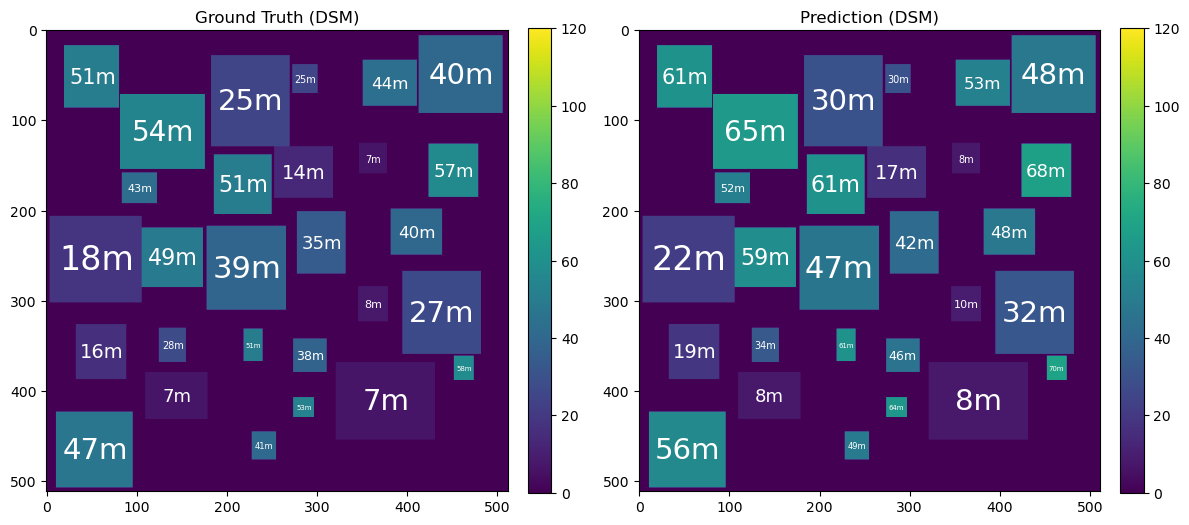

=== Metrics ===
mIoU:   1.00
MSE:    23.15
MAE:    2.85
RMSE:   4.81
delta1: 1.00
delta2: 1.00
delta3: 1.00


In [38]:
import numpy as np
import matplotlib.pyplot as plt

def check_overlap(rect1, rect2):
    """Check if two rectangles overlap"""
    x1, y1, w1, h1 = rect1
    x2, y2, w2, h2 = rect2
    return not (x1 + w1 <= x2 or x2 + w2 <= x1 or
               y1 + h1 <= y2 or y2 + h2 <= y1)

def generate_building(size_range):
    """Generate random building dimensions within given range"""
    min_size, max_size = size_range
    width = np.random.randint(min_size, max_size)
    height = np.random.randint(min_size, max_size)
    return width, height

def try_place_buildings(tile_size=512, n_buildings=20, min_height=5, max_height=101):
    buildings = []  # (x_start, y_start, width, height, building_height)
    # Create size ranges based on n_buildings
    small = n_buildings // 3
    medium = (n_buildings - small) // 2
    large = n_buildings - small - medium
    size_ranges = [(20,40)]*small + [(50,70)]*medium + [(80,120)]*large
    max_attempts = 1000
    
    for size_range in size_ranges:
        attempts = 0
        while attempts < max_attempts:
            width, height = generate_building(size_range)
            x = np.random.randint(0, tile_size - width)
            y = np.random.randint(0, tile_size - height)
            building_height = np.random.randint(min_height, max_height)
            
            new_rect = (x, y, width, height)
            overlap = False
            for b in buildings:
                if check_overlap(new_rect, (b[0], b[1], b[2], b[3])):
                    overlap = True
                    break
            
            if not overlap:
                buildings.append((x, y, width, height, building_height))
                break
            attempts += 1
    
    return buildings

# Create DSM tiles
dsm_tile = np.zeros((512, 512), dtype=float)
dsm_pred = np.zeros((512, 512), dtype=float)

# Generate and place buildings
# Parameters for building generation
tile_size = 512
n_buildings = 30
min_height = 5
max_height = 60

buildings = try_place_buildings(tile_size=tile_size, 
                              n_buildings=n_buildings, 
                              min_height=min_height, 
                              max_height=max_height)
for x, y, w, h, height in buildings:
    dsm_tile[x:x+w, y:y+h] = height
    dsm_pred[x:x+w, y:y+h] = height * 1.2

# Compute metrics
gt_footprint_mask = dsm_tile > 0
pred_footprint_mask = dsm_pred > 0
intersection = np.logical_and(gt_footprint_mask, pred_footprint_mask).sum()
union = np.logical_or(gt_footprint_mask, pred_footprint_mask).sum()
mIoU = intersection / union

abs_diff = np.abs(dsm_pred - dsm_tile)
tile_mse = np.mean(abs_diff ** 2)
tile_mae = np.mean(abs_diff)
tile_rmse = np.sqrt(tile_mse)

epsilon = 1e-9
max_ratio = np.maximum(dsm_pred / (dsm_tile + epsilon),
                       dsm_tile / (dsm_pred + epsilon))
tile_delta1 = np.mean(max_ratio < 1.25)
tile_delta2 = np.mean(max_ratio < 1.25 ** 2)
tile_delta3 = np.mean(max_ratio < 1.25 ** 3)

# Visualization with height annotations
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

for idx, (data, title) in enumerate([(dsm_tile, "Ground Truth (DSM)"), 
                                   (dsm_pred, "Prediction (DSM)")]):
    im = axs[idx].imshow(data, cmap='viridis', vmin=0, vmax=120)
    axs[idx].set_title(title)
    fig.colorbar(im, ax=axs[idx], fraction=0.046, pad=0.04)
    
    # Add height annotations
    for x, y, w, h, height in buildings:
        text_height = height if idx == 0 else height * 1.2
        font_size = min(w, h) // 4  # Scale font with building size
        axs[idx].text(y + h/2, x + w/2, f'{text_height:.0f}m', 
                     color='white', ha='center', va='center',
                     fontsize=font_size)

plt.tight_layout()
plt.show()

print("=== Metrics ===")
print(f"mIoU:   {mIoU:.2f}")
print(f"MSE:    {tile_mse:.2f}")
print(f"MAE:    {tile_mae:.2f}")
print(f"RMSE:   {tile_rmse:.2f}")
print(f"delta1: {tile_delta1:.2f}")
print(f"delta2: {tile_delta2:.2f}")
print(f"delta3: {tile_delta3:.2f}")

### version 4

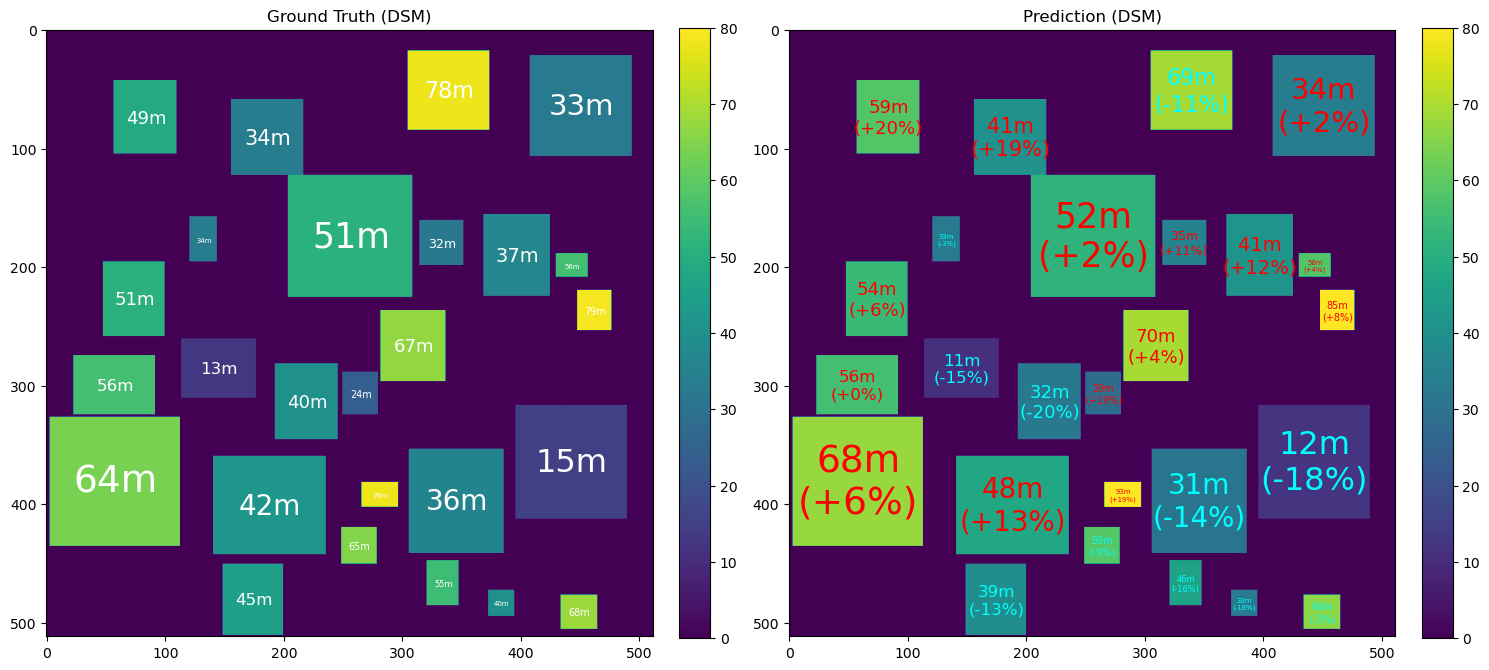

=== Metrics ===
mIoU:   1.00
MSE:    8.74
MAE:    1.50
RMSE:   2.96
delta1: 1.00
delta2: 1.00
delta3: 1.00

Estimation Distribution:
Overestimated:   15/26 buildings
Underestimated:  11/26 buildings
Exact:           0/26 buildings


In [41]:
import numpy as np
import matplotlib.pyplot as plt

def check_overlap(rect1, rect2):
    """Check if two rectangles overlap"""
    x1, y1, w1, h1 = rect1
    x2, y2, w2, h2 = rect2
    return not (x1 + w1 <= x2 or x2 + w2 <= x1 or
               y1 + h1 <= y2 or y2 + h2 <= y1)

def generate_building(size_range):
    """Generate random building dimensions within given range"""
    min_size, max_size = size_range
    width = np.random.randint(min_size, max_size)
    height = np.random.randint(min_size, max_size)
    return width, height

def try_place_buildings(tile_size=512, n_buildings=20, min_height=5, max_height=101):
    buildings = []  # (x_start, y_start, width, height, building_height, pred_factor)
    small = n_buildings // 3
    medium = (n_buildings - small) // 2
    large = n_buildings - small - medium
    size_ranges = [(20,40)]*small + [(50,70)]*medium + [(80,120)]*large
    max_attempts = 1000
    
    for size_range in size_ranges:
        attempts = 0
        while attempts < max_attempts:
            width, height = generate_building(size_range)
            x = np.random.randint(0, tile_size - width)
            y = np.random.randint(0, tile_size - height)
            building_height = np.random.randint(min_height, max_height)
            pred_factor = np.random.uniform(0.8, 1.2)  # Random under/over estimation
            
            new_rect = (x, y, width, height)
            overlap = False
            for b in buildings:
                if check_overlap(new_rect, (b[0], b[1], b[2], b[3])):
                    overlap = True
                    break
            
            if not overlap:
                buildings.append((x, y, width, height, building_height, pred_factor))
                break
            attempts += 1
    
    return buildings

# Create DSM tiles
tile_size = 512
n_buildings = 30
min_height = 10
max_height = 80

dsm_tile = np.zeros((tile_size, tile_size), dtype=float)
dsm_pred = np.zeros((tile_size, tile_size), dtype=float)

# Generate and place buildings
buildings = try_place_buildings(tile_size=tile_size, 
                              n_buildings=n_buildings, 
                              min_height=min_height, 
                              max_height=max_height)

# Place buildings and their predictions
for x, y, w, h, height, pred_factor in buildings:
    dsm_tile[x:x+w, y:y+h] = height
    dsm_pred[x:x+w, y:y+h] = height * pred_factor

# Compute metrics
gt_footprint_mask = dsm_tile > 0
pred_footprint_mask = dsm_pred > 0
intersection = np.logical_and(gt_footprint_mask, pred_footprint_mask).sum()
union = np.logical_or(gt_footprint_mask, pred_footprint_mask).sum()
mIoU = intersection / union

abs_diff = np.abs(dsm_pred - dsm_tile)
tile_mse = np.mean(abs_diff ** 2)
tile_mae = np.mean(abs_diff)
tile_rmse = np.sqrt(tile_mse)

epsilon = 1e-9
max_ratio = np.maximum(dsm_pred / (dsm_tile + epsilon),
                      dsm_tile / (dsm_pred + epsilon))
tile_delta1 = np.mean(max_ratio < 1.25)
tile_delta2 = np.mean(max_ratio < 1.25 ** 2)
tile_delta3 = np.mean(max_ratio < 1.25 ** 3)

# Visualization
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

for idx, (data, title) in enumerate([(dsm_tile, "Ground Truth (DSM)"), 
                                   (dsm_pred, "Prediction (DSM)")]):
    im = axs[idx].imshow(data, cmap='viridis', vmin=0, vmax=max_height)
    axs[idx].set_title(title)
    fig.colorbar(im, ax=axs[idx], fraction=0.046, pad=0.04)
    
    for x, y, w, h, height, pred_factor in buildings:
        if idx == 0:
            # Ground truth
            text = f'{height:.0f}m'
            color = 'white'
        else:
            # Prediction
            pred_height = height * pred_factor
            error_pct = (pred_height - height) / height * 100
            text = f'{pred_height:.0f}m\n({error_pct:+.0f}%)'
            color = 'red' if pred_factor > 1 else 'cyan' if pred_factor < 1 else 'white'
        
        font_size = min(w, h) // 4
        axs[idx].text(y + h/2, x + w/2, text,
                     color=color, ha='center', va='center',
                     fontsize=font_size)

plt.tight_layout()
plt.show()

# Print metrics
print("=== Metrics ===")
print(f"mIoU:   {mIoU:.2f}")
print(f"MSE:    {tile_mse:.2f}")
print(f"MAE:    {tile_mae:.2f}")
print(f"RMSE:   {tile_rmse:.2f}")
print(f"delta1: {tile_delta1:.2f}")
print(f"delta2: {tile_delta2:.2f}")
print(f"delta3: {tile_delta3:.2f}")

# Print estimation statistics
over_est = sum(1 for _, _, _, _, _, f in buildings if f > 1)
under_est = sum(1 for _, _, _, _, _, f in buildings if f < 1)
print(f"\nEstimation Distribution:")
print(f"Overestimated:   {over_est}/{len(buildings)} buildings")
print(f"Underestimated:  {under_est}/{len(buildings)} buildings")
print(f"Exact:           {len(buildings)-over_est-under_est}/{len(buildings)} buildings")

# Binary Segmentation IoU: Building Detection Case Study

## version 1

Here's a clear example demonstrating the difference between binary IoU and mIoU calculation:



In [1]:
import numpy as np

def calculate_binary_metrics(pred, gt, building_class=1):
    """
    Calculate both building-specific IoU and mIoU for binary segmentation.
    
    Args:
        pred (np.ndarray): Predicted binary mask (0: background, 1: building)
        gt (np.ndarray): Ground truth binary mask (0: background, 1: building)
        building_class (int): Label value for buildings (default=1)
    
    Returns:
        tuple: (building_iou, mean_iou)
    """
    # Calculate IoU for buildings only
    building_intersection = np.logical_and(pred == building_class, 
                                         gt == building_class).sum()
    building_union = np.logical_or(pred == building_class, 
                                 gt == building_class).sum()
    building_iou = building_intersection / building_union if building_union > 0 else 0.0

    # Calculate IoU for both classes (background and building)
    background_intersection = np.logical_and(pred == 0, gt == 0).sum()
    background_union = np.logical_or(pred == 0, gt == 0).sum()
    background_iou = background_intersection / background_union if background_union > 0 else 0.0
    
    # Calculate mean IoU
    mean_iou = (background_iou + building_iou) / 2

    return building_iou, mean_iou

# Example usage
pred = np.array([[0, 1, 1],
                 [0, 1, 0],
                 [0, 0, 0]])

gt = np.array([[0, 1, 1],
               [0, 1, 1],
               [0, 0, 0]])

building_iou, mean_iou = calculate_binary_metrics(pred, gt)
print(f"Building IoU: {building_iou:.4f}")  # Building-specific IoU
print(f"Mean IoU: {mean_iou:.4f}")         # Average of building and background IoUs

Building IoU: 0.7500
Mean IoU: 0.7917




This example shows that:
1. Building IoU focuses only on the building class (1)
2. Mean IoU averages the IoU values for both classes (0 and 1)
3. These metrics can differ significantly, especially when background is dominant

For building footprint detection, the building-specific IoU is often more relevant than mIoU.

## version 2

Let me demonstrate the difference between building-specific IoU and mean IoU (mIoU) for binary building detection:



In [2]:
# Example demonstrating IoU calculation methods for binary building detection
import numpy as np

# Sample predictions and ground truth (1: building, 0: background)
pred = np.array([[0, 1, 1],
                 [0, 1, 0],
                 [0, 0, 0]])

gt = np.array([[0, 1, 1],
               [0, 1, 1],
               [0, 0, 0]])

def compare_iou_metrics(pred, gt):
    """Compare different IoU calculation methods for binary building detection"""
    # Method 1: Building-specific IoU
    building_intersection = np.logical_and(pred == 1, gt == 1).sum()
    building_union = np.logical_or(pred == 1, gt == 1).sum()
    building_iou = building_intersection / building_union

    # Method 2: Mean IoU (average of building and background IoUs)
    background_intersection = np.logical_and(pred == 0, gt == 0).sum()
    background_union = np.logical_or(pred == 0, gt == 0).sum()
    background_iou = background_intersection / background_union
    mean_iou = (building_iou + background_iou) / 2

    return building_iou, mean_iou

building_iou, mean_iou = compare_iou_metrics(pred, gt)
print(f"Building IoU: {building_iou:.4f}")
print(f"Mean IoU: {mean_iou:.4f}")

Building IoU: 0.7500
Mean IoU: 0.7917




### Key Points:
1. **Building-specific IoU**: Only considers the accuracy of building detection (foreground)
2. **Mean IoU (mIoU)**: Averages IoU for both buildings and background
3. **Practical Impact**: 
   - For building detection tasks, building-specific IoU is often more relevant
   - mIoU can be misleading due to large background areas
   - Results can differ significantly, especially with imbalanced classes

### Recommendation:
For building footprint detection, report the building-specific IoU as it directly measures the task performance. Include mIoU only if required for comparison with other studies.

# Confusion Matrix Generation for Image Segmentation Evaluation in the Evaluator Class

The `_generate_matrix` method is a key component of the `Evaluator` class that generates a confusion matrix for evaluating image segmentation results. Let me break down how it works:

1. **Mask Creation**:


In [ ]:
mask = (gt_image >= 0) & (gt_image < self.num_class)

First, it creates a boolean mask that identifies valid pixels in the ground truth image. Valid pixels must be non-negative and less than the number of classes.

2. **Label Encoding**:


In [ ]:
label = self.num_class * gt_image[mask].astype('int') + pre_image[mask]

This line performs a clever encoding trick to create unique identifiers for each ground truth/prediction pair. It multiplies the ground truth values by the number of classes and adds the predicted values. This creates a flattened index that uniquely identifies each combination.

3. **Counting Occurrences**:


In [ ]:
count = np.bincount(label, minlength=self.num_class ** 2)

The `np.bincount` function counts how many times each encoded label appears. The `minlength` parameter ensures the output array has enough space for all possible class combinations.

4. **Matrix Reshaping**:


In [ ]:
confusion_matrix = count.reshape(self.num_class, self.num_class)

Finally, the flat count array is reshaped into a square confusion matrix where:
- Rows represent the ground truth classes
- Columns represent the predicted classes
- Each cell (i,j) contains the count of pixels that were actually class i but predicted as class j

A key "gotcha" is that this method assumes the input images contain valid class labels (0 to num_class-1). Any values outside this range will be filtered out by the mask.

This implementation is particularly efficient as it avoids explicit loops and uses NumPy's vectorized operations throughout.

I'll help explain the `_generate_matrix` function with a simple example.

Let's say we have:
- 3 classes (self.num_class = 3)
- A small 3x3 ground truth image (gt_image)
- A corresponding predicted image (pre_image)



In [1]:
import numpy as np

def example_confusion_matrix():
    # Example with 3 classes (0, 1, 2)
    num_class = 3
    
    # Ground truth image (3x3)
    gt_image = np.array([
        [0, 1, 2],
        [1, 0, 1],
        [2, 1, 0]
    ])
    
    # Predicted image (3x3)
    pre_image = np.array([
        [0, 1, 1],  # Note: last pixel predicts 1 instead of 2
        [1, 0, 1],  # These predictions are correct
        [2, 0, 0]   # Middle and right pixels are wrong
    ])
    
    # Step 1: Create mask (all True in this case since all values are valid)
    mask = (gt_image >= 0) & (gt_image < num_class)
    print("Mask:\n", mask)
    
    # Step 2: Create encoded labels
    # Formula: num_class * gt + pred
    labels = num_class * gt_image[mask].astype('int') + pre_image[mask]
    print("\nEncoded labels:\n", labels)
    print("Encoded label meanings:")
    for i in range(len(labels)):
        gt = gt_image[mask][i]
        pred = pre_image[mask][i]
        encoded = labels[i]
        print(f"GT={gt}, Pred={pred} → Encoded={encoded}")
    
    # Step 3: Count occurrences
    count = np.bincount(labels, minlength=num_class**2)
    print("\nCounts:", count)
    
    # Step 4: Reshape to confusion matrix
    confusion_matrix = count.reshape(num_class, num_class)
    print("\nConfusion Matrix:\n", confusion_matrix)
    
    return confusion_matrix

# Run the example
confusion_matrix = example_confusion_matrix()

Mask:
 [[ True  True  True]
 [ True  True  True]
 [ True  True  True]]

Encoded labels:
 [0 4 7 4 0 4 8 3 0]
Encoded label meanings:
GT=0, Pred=0 → Encoded=0
GT=1, Pred=1 → Encoded=4
GT=2, Pred=1 → Encoded=7
GT=1, Pred=1 → Encoded=4
GT=0, Pred=0 → Encoded=0
GT=1, Pred=1 → Encoded=4
GT=2, Pred=2 → Encoded=8
GT=1, Pred=0 → Encoded=3
GT=0, Pred=0 → Encoded=0

Counts: [3 0 0 1 3 0 0 1 1]

Confusion Matrix:
 [[3 0 0]
 [1 3 0]
 [0 1 1]]




The output would look like:


In [ ]:
Mask:
 [[ True  True  True]
  [ True  True  True]
  [ True  True  True]]

Encoded labels:
 [0 4 7 4 0 4 8 3 0]

Encoded label meanings:
GT=0, Pred=0 → Encoded=0
GT=1, Pred=1 → Encoded=4
GT=2, Pred=1 → Encoded=7
GT=1, Pred=1 → Encoded=4
GT=0, Pred=0 → Encoded=0
GT=1, Pred=1 → Encoded=4
GT=2, Pred=2 → Encoded=8
GT=1, Pred=0 → Encoded=3
GT=0, Pred=0 → Encoded=0

Counts: [3 0 0 1 3 0 0 1 1]

Confusion Matrix:
 [[3 0 0]
  [1 3 0]
  [0 1 1]]



In this confusion matrix:
- Row index = ground truth class
- Column index = predicted class
- Values show how many pixels were classified as each combination

For example:
- [0,0] = 3: Three pixels correctly classified as class 0
- [1,1] = 3: Three pixels correctly classified as class 1
- [2,2] = 1: One pixel correctly classified as class 2
- [1,0] = 1: One pixel incorrectly classified as class 0 when it should be class 1
- [2,1] = 1: One pixel incorrectly classified as class 1 when it should be class 2